In [1]:
# Importing the required libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as py
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1.) Read the data from NDAP_REPORT_7004.csv [saved locally] into a pandas dataframe.

df = pd.read_csv(r'C:\Users\KSHITIJ\Desktop\IIT BOMBAY\7TH SEMESTER\6 DS 203 PROGRAMMING FOR DATA SCIENCE\ASSIGNMENTS\ASSIGNMENT_4\NDAP_REPORT_7004.csv') # Importing the .csv file
pd.reset_option('max_columns') # viewing all the columns
df.head() # viewing first 5 rows of the dataFrame

,Rowid,Country,State lgd code,State,District lgd code,District,Year,Type of residence namely rural or urban,Number of census houses,Houses having grass or thatch or bamboo etc. as material of wall,Houses having plastic or polythene as material of wall,Houses having mud or unburnt brick as material of wall,Houses having wood as material of wall,Houses having stone not packed with mortar as material of wall,Houses having stone packed with mortar as material of wall,Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall,Houses having burnt brick as material of wall,Houses having concrete as material of wall,Houses having any other material of wall
0,1,India,1,Jammu And Kashmir,1,Anantnag,2011,Rural,109465,270,1331,22710.000000,3014.00000,3034.000000,480.000000,229.000000,76229.00000,1400.000000,768.000000
1,2,India,1,Jammu And Kashmir,1,Anantnag,2011,Urban,33522,69,121,6807.000000,123.00000,268.000000,93.000000,98.000000,23789.00000,1894.000000,260.000000
2,3,India,1,Jammu And Kashmir,2,Budgam,2011,Rural,85561.57321,134.1822704,168.9702664,7174.278724,960.14869,748.438886,306.134365,214.691633,73342.04111,1013.821599,1498.865657
3,4,India,1,Jammu And Kashmir,2,Budgam,2011,Urban,13136,49,27,935.000000,24.00000,187.000000,30.000000,39.000000,11297.00000,454.000000,94.000000
4,5,India,1,Jammu And Kashmir,3,Baramulla,2011,Rural,120312.4268,410.8177296,173.0297336,19207.721280,3227.85131,12552.561110,5479.865635,1740.308367,72686.95889,2118.178401,2715.134343


In [3]:
# 2.) Print the number of columns and rows.

print('Number of Rows =', df.shape[0])
print('Number of Columns =', df.shape[1])

Number of Rows = 1473
Number of Columns = 19


In [4]:
# 3.) Print the number of unique values in each column.

print(df.apply(lambda col: len(col.unique()))) # Applying lamba function to get count of unique entires in each column.

Rowid                                                                                        1473
Country                                                                                         1
State lgd code                                                                                 36
State                                                                                          36
District lgd code                                                                             737
District                                                                                      732
Year                                                                                            1
Type of residence namely rural or urban                                                         2
Number of census houses                                                                      1439
Houses having grass or thatch or bamboo etc. as material of wall                             1366
Houses having plasti

In [5]:
# 4.) Print the datatype of each column.

print(df.dtypes)

Rowid                                                                                          int64
Country                                                                                       object
State lgd code                                                                                 int64
State                                                                                         object
District lgd code                                                                              int64
District                                                                                      object
Year                                                                                           int64
Type of residence namely rural or urban                                                       object
Number of census houses                                                                       object
Houses having grass or thatch or bamboo etc. as material of wall                           

In [6]:
# 5.) Print a histogram of number missing values for each column sorted from low to high.

null_column_df = df.isnull().sum() # Getting the count of NaN values in each column
null_column_df = null_column_df.to_frame().reset_index() # Converting the Series type data structure to dataFrame type data structure

# Renaming of the columns of 'null_column_df'

null_column_df_headers = ['Column_Name','NaN_Count']
null_column_df.columns = null_column_df_headers
null_column_df

,Column_Name,NaN_Count
0,Rowid,0
1,Country,0
2,State lgd code,0
3,State,0
4,District lgd code,0
5,District,0
6,Year,0
7,Type of residence namely rural or urban,0
8,Number of census houses,5
9,Houses having grass or thatch or bamboo etc. a...,5


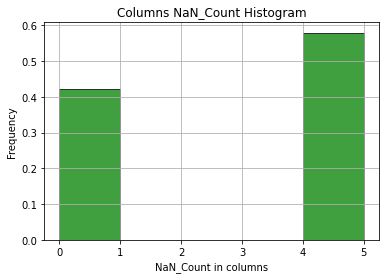

In [7]:
# Command for plotting NaN_Count histogram for the 'Columns NaN_Count'.

n, bins, patches = plt.hist(null_column_df['NaN_Count'], 5, density=True, facecolor='g', alpha=0.75,  edgecolor = 'black') 
plt.xlabel('NaN_Count in columns')
plt.ylabel('Frequency')
plt.title('Columns NaN_Count Histogram')
plt.grid(True)
plt.show()

In [8]:
# 6.) Plot a histogram of number of missing values for each row sorted from low to high.

null_rows_df = df.isnull().sum(axis = 1) # Getting the count of NaN values in each row
null_rows_df = null_rows_df.to_frame().reset_index() # Converting the Series type data structure to dataFrame type data structure

# Renaming of the columns of 'null_rows_df'

null_rows_df_headers = ['Row_Number','NaN_Count'] 
null_rows_df.columns = null_rows_df_headers
null_rows_df

,Row_Number,NaN_Count
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1468,1468,0
1469,1469,0
1470,1470,0
1471,1471,0


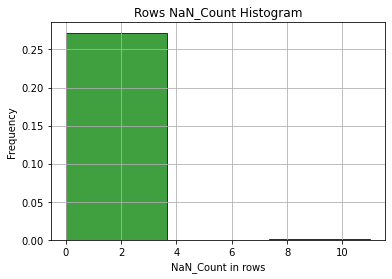

In [9]:
# Command for plotting NaN_Count histogram for the 'null_rows_df'.

n, bins, patches = plt.hist(null_rows_df['NaN_Count'], 3, density=True, facecolor='g', alpha=0.75,  edgecolor = 'black')
plt.xlabel('NaN_Count in rows')
plt.ylabel('Frequency')
plt.title('Rows NaN_Count Histogram')
plt.grid(True)
plt.show()

In [10]:
# 7.) If any column’s datatype or values needs to be cleaned, then do so

df[['Country', 'State','District']] = df[['Country', 'State','District']].astype(str) # Converting the entries in these column to string type to bring unifromity in the column 

# Replacing NaN values with 0 in each of the numberic columns.

df['Number of census houses'].fillna(0, inplace=True)
df['Houses having grass or thatch or bamboo etc. as material of wall'].fillna(0, inplace=True)
df['Houses having plastic or polythene as material of wall'].fillna(0, inplace=True)
df['Houses having mud or unburnt brick as material of wall'].fillna(0, inplace=True)
df['Houses having wood as material of wall'].fillna(0, inplace=True)
df['Houses having stone not packed with mortar as material of wall'].fillna(0, inplace=True)
df['Houses having stone packed with mortar as material of wall'].fillna(0, inplace=True)
df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall'].fillna(0, inplace=True)
df['Houses having burnt brick as material of wall'].fillna(0, inplace=True)
df['Houses having concrete as material of wall'].fillna(0, inplace=True)
df['Houses having any other material of wall'].fillna(0, inplace=True)

# Converting the entries in the respective columns to float type to bring unifromity in the column [Use of exception handling to avoid errors] 

for i in range(df.shape[0]):
    
    try:
        df['Number of census houses'][i] = float(df['Number of census houses'][i])
    except:
        df['Number of census houses'][i] = float(0.00)
        
    try:
        df['Houses having grass or thatch or bamboo etc. as material of wall'][i] = float(df['Houses having grass or thatch or bamboo etc. as material of wall'][i])
    except:
        df['Houses having grass or thatch or bamboo etc. as material of wall'][i] = float(0.00)


    try:
        df['Houses having plastic or polythene as material of wall'][i] = float(df['Houses having plastic or polythene as material of wall'][i])
    except:
        df['Houses having plastic or polythene as material of wall'][i] = float(0.00)


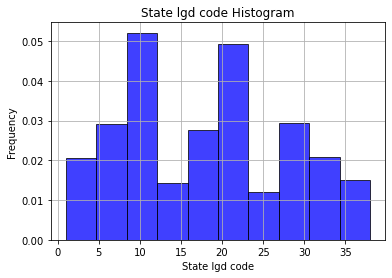

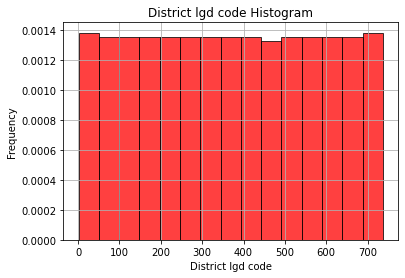

In [11]:
# 8.) For all discrete variables plot histograms

# Command for historgam plot for the discrete variables of our dataset.

n, bins, patches = plt.hist(df['State lgd code'], 10, density=True, facecolor='b', alpha=0.75, edgecolor = 'black')

# Labelling of the axis and title
plt.xlabel('State lgd code')
plt.ylabel('Frequency')
plt.title('State lgd code Histogram')

plt.grid(True) # Command to add grid lines to our graph
plt.show()

df_1 = df.drop(204)
df_1.reset_index()
n, bins, patches = plt.hist(df_1['District lgd code'], 15, density=True, facecolor='r', alpha=0.75,  edgecolor = 'black')
plt.xlabel('District lgd code')
plt.ylabel('Frequency')
plt.title('District lgd code Histogram')
plt.grid(True)
plt.show()

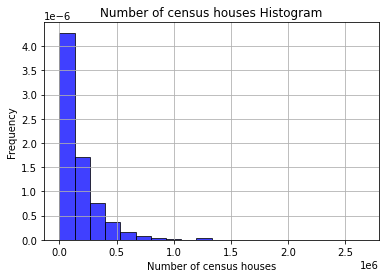

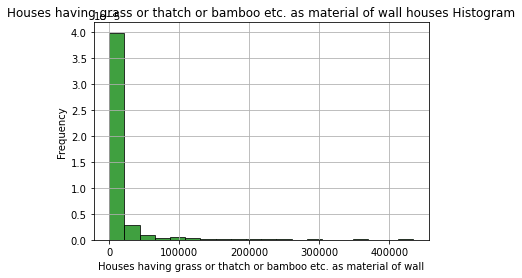

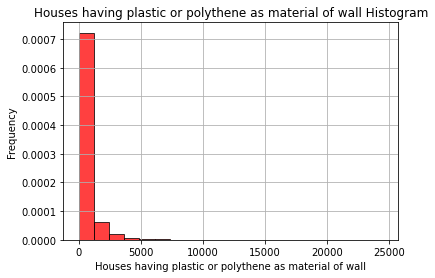

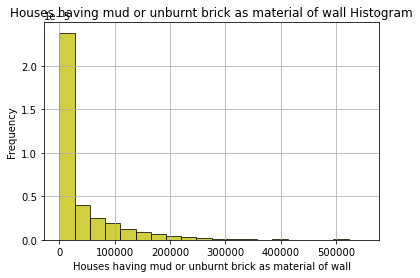

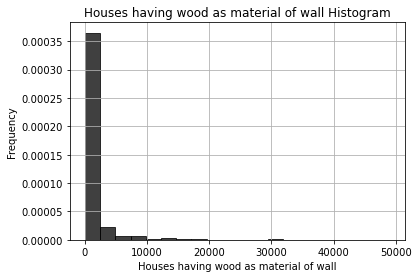

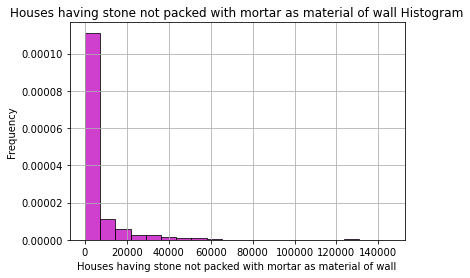

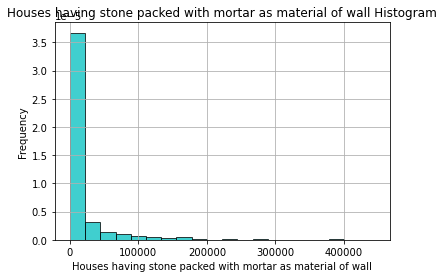

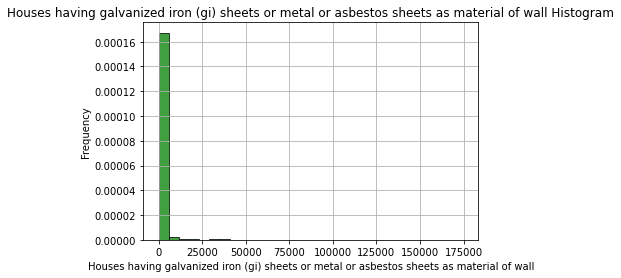

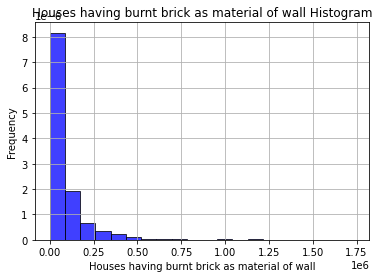

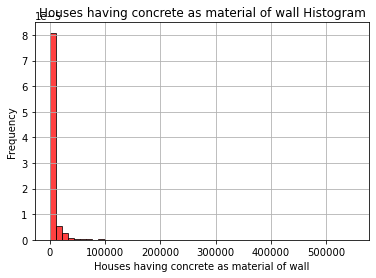

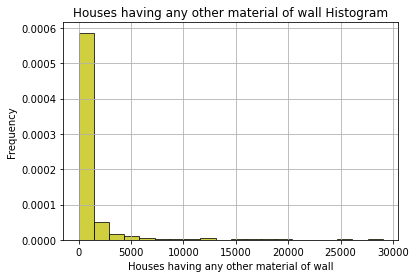

In [12]:
# 9.) For all continuous variables plot histogram with appropriate number of bins

# Command for historgam plot for the continous (having decimal entires in this case) variables of our dataset.

n, bins, patches = plt.hist(df['Number of census houses'], 20, density=True, facecolor='b', alpha=0.75, edgecolor = 'black')
plt.xlabel('Number of census houses')
plt.ylabel('Frequency')
plt.title('Number of census houses Histogram')
plt.grid(True)
plt.show()

n, bins, patches = plt.hist(df['Houses having grass or thatch or bamboo etc. as material of wall'], 20, density=True, facecolor='g', alpha=0.75, edgecolor = 'black')
plt.xlabel('Houses having grass or thatch or bamboo etc. as material of wall')
plt.ylabel('Frequency')
plt.title('Houses having grass or thatch or bamboo etc. as material of wall houses Histogram')
plt.grid(True)
plt.show()

n, bins, patches = plt.hist(df['Houses having plastic or polythene as material of wall'], 20, density=True, facecolor='r', alpha=0.75, edgecolor = 'black')
plt.xlabel('Houses having plastic or polythene as material of wall')
plt.ylabel('Frequency')
plt.title('Houses having plastic or polythene as material of wall Histogram')
plt.grid(True)
plt.show()

n, bins, patches = plt.hist(df['Houses having mud or unburnt brick as material of wall'], 20, density=True, facecolor='y', alpha=0.75, edgecolor = 'black')
plt.xlabel('Houses having mud or unburnt brick as material of wall')
plt.ylabel('Frequency')
plt.title('Houses having mud or unburnt brick as material of wall Histogram')
plt.grid(True)
plt.show()

n, bins, patches = plt.hist(df['Houses having wood as material of wall'], 20, density=True, facecolor='k', alpha=0.75, edgecolor = 'black')
plt.xlabel('Houses having wood as material of wall')
plt.ylabel('Frequency')
plt.title('Houses having wood as material of wall Histogram')
plt.grid(True)
plt.show()

n, bins, patches = plt.hist(df['Houses having stone not packed with mortar as material of wall'], 20, density=True, facecolor='m', alpha=0.75, edgecolor = 'black')
plt.xlabel('Houses having stone not packed with mortar as material of wall')
plt.ylabel('Frequency')
plt.title('Houses having stone not packed with mortar as material of wall Histogram')
plt.grid(True)
plt.show()

n, bins, patches = plt.hist(df['Houses having stone packed with mortar as material of wall'], 20, density=True, facecolor='c', alpha=0.75, edgecolor = 'black')
plt.xlabel('Houses having stone packed with mortar as material of wall')
plt.ylabel('Frequency')
plt.title('Houses having stone packed with mortar as material of wall Histogram')
plt.grid(True)
plt.show()

n, bins, patches = plt.hist(df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall'], 30, density=True, facecolor='g', alpha=0.75, edgecolor = 'black')
plt.xlabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall')
plt.ylabel('Frequency')
plt.title('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall Histogram')
plt.grid(True)
plt.show()

n, bins, patches = plt.hist(df['Houses having burnt brick as material of wall'], 20, density=True, facecolor='b', alpha=0.75, edgecolor = 'black')
plt.xlabel('Houses having burnt brick as material of wall')
plt.ylabel('Frequency')
plt.title('Houses having burnt brick as material of wall Histogram')
plt.grid(True)
plt.show()

n, bins, patches = plt.hist(df['Houses having concrete as material of wall'], 50, density=True, facecolor='r', alpha=0.75, edgecolor = 'black')
plt.xlabel('Houses having concrete as material of wall')
plt.ylabel('Frequency')
plt.title('Houses having concrete as material of wall Histogram')
plt.grid(True)
plt.show()

n, bins, patches = plt.hist(df['Houses having any other material of wall'], 20, density=True, facecolor='y', alpha=0.75, edgecolor = 'black')
plt.xlabel('Houses having any other material of wall')
plt.ylabel('Frequency')
plt.title('Houses having any other material of wall Histogram')
plt.grid(True)
plt.show()

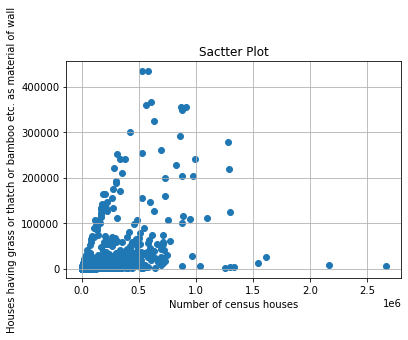

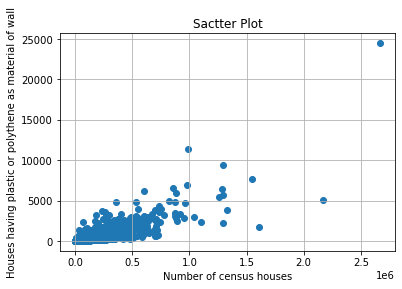

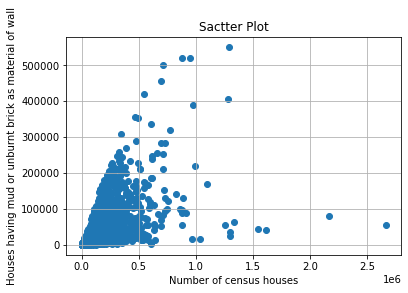

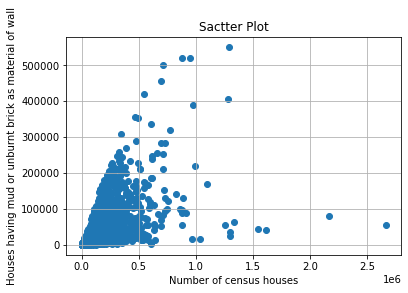

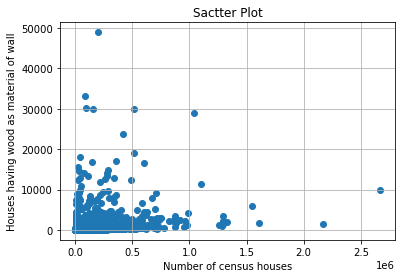

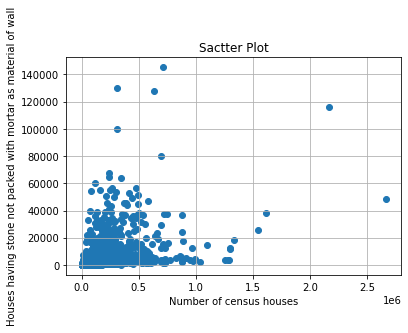

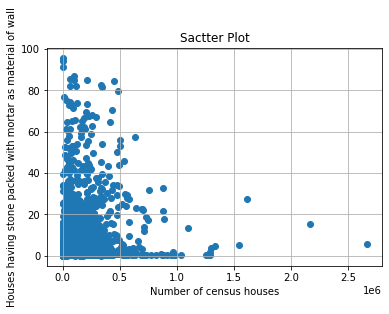

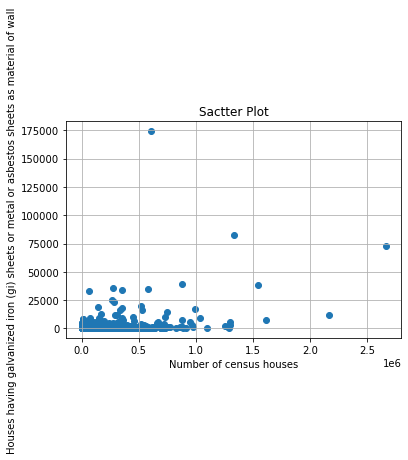

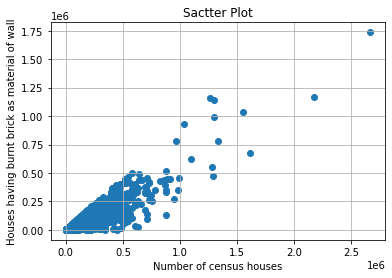

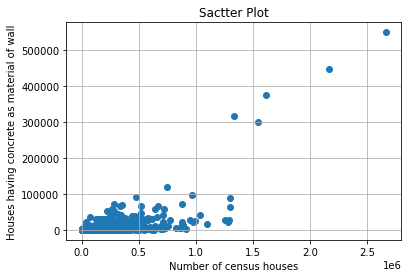

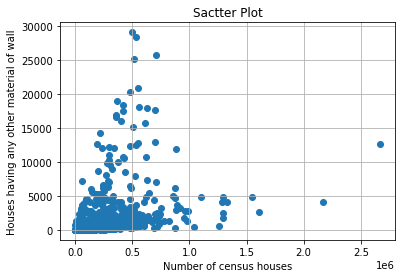

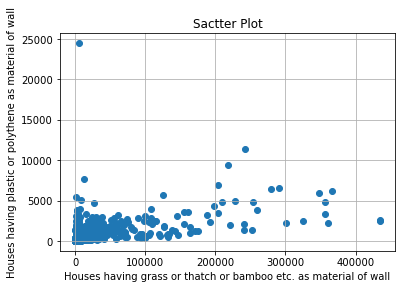

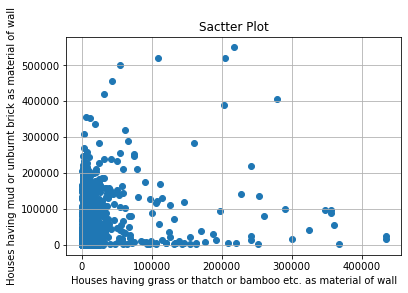

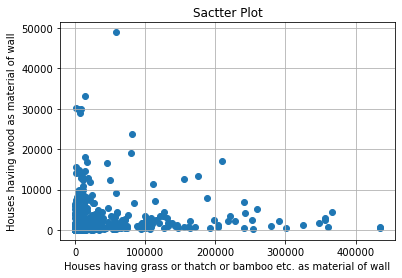

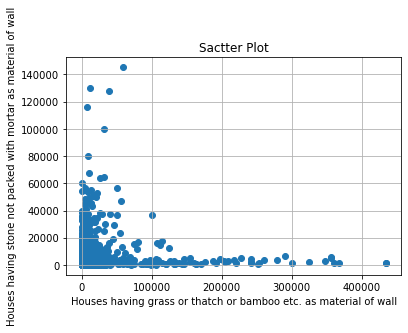

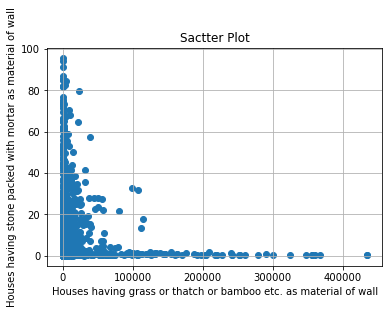

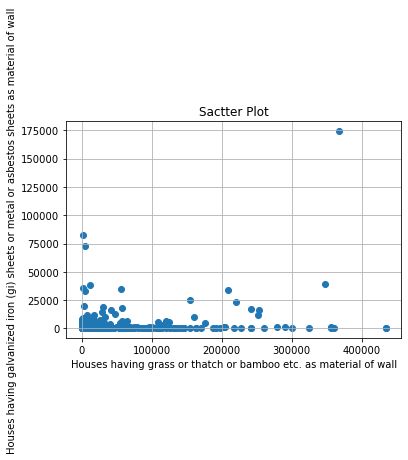

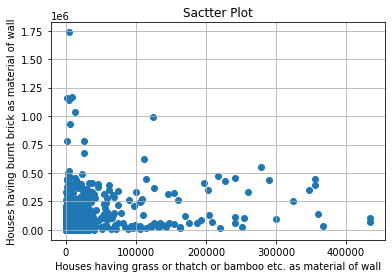

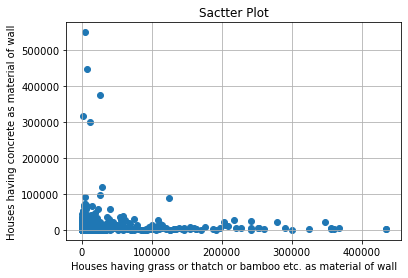

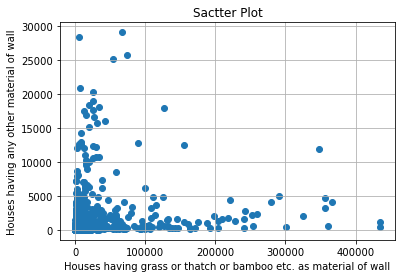

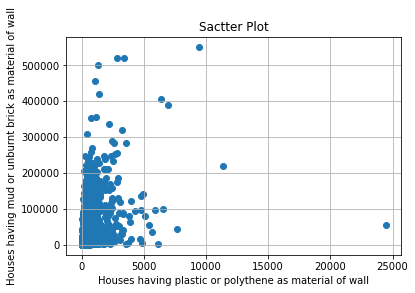

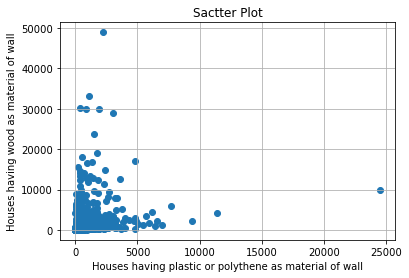

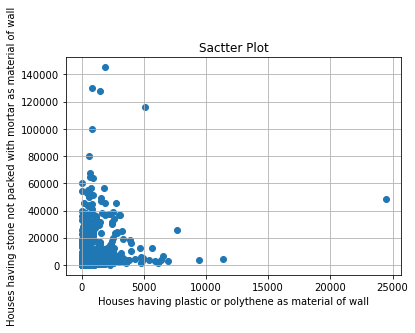

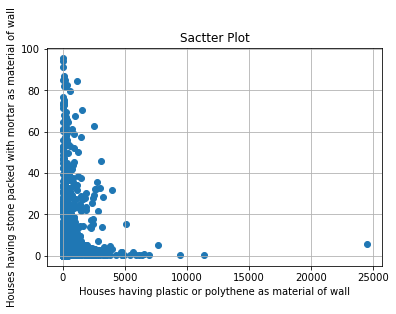

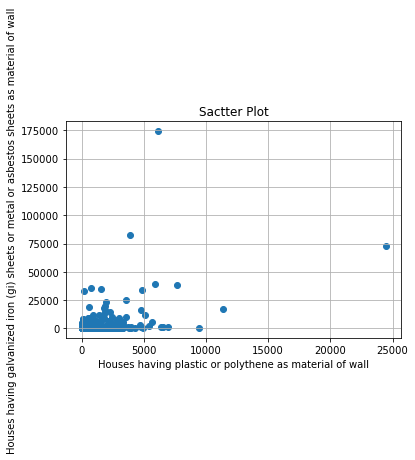

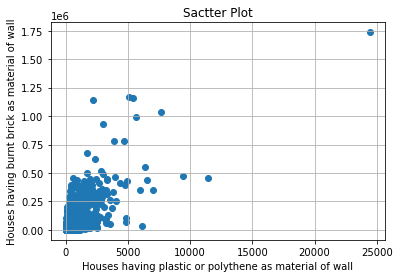

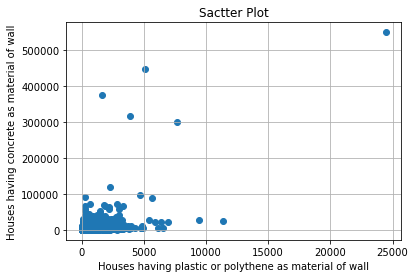

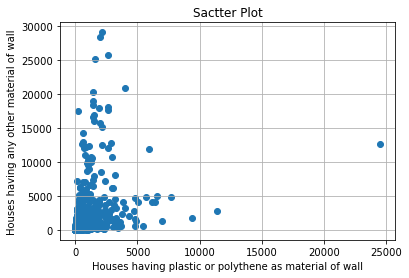

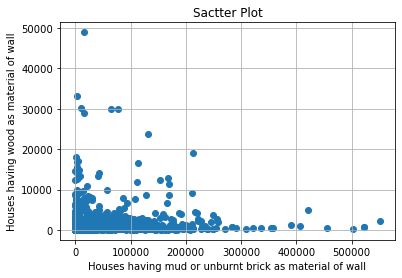

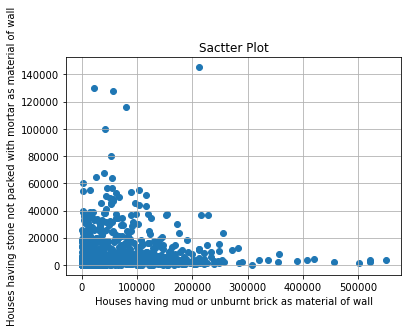

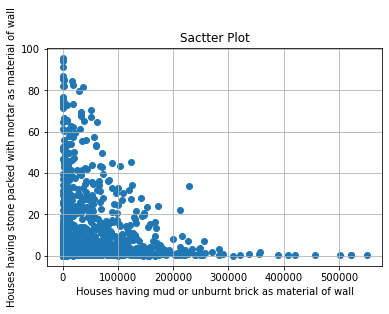

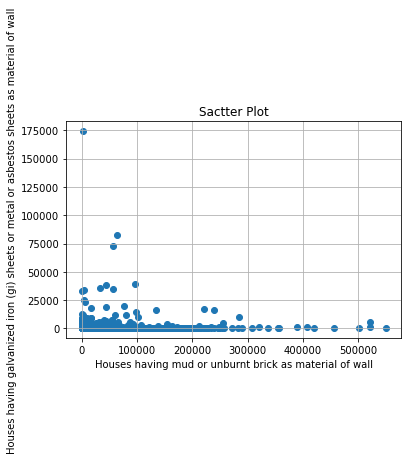

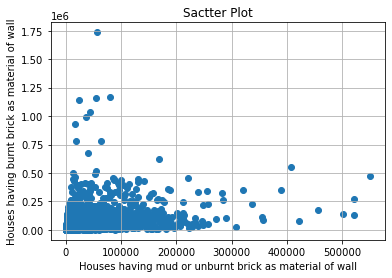

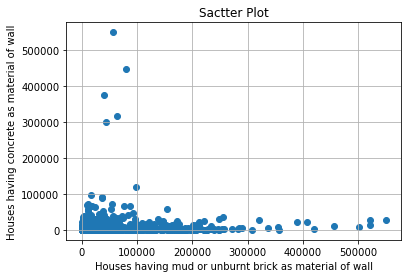

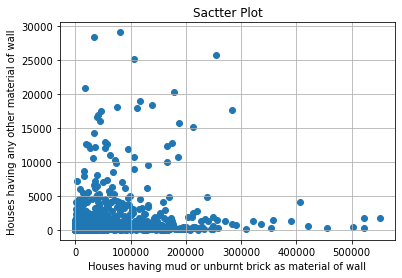

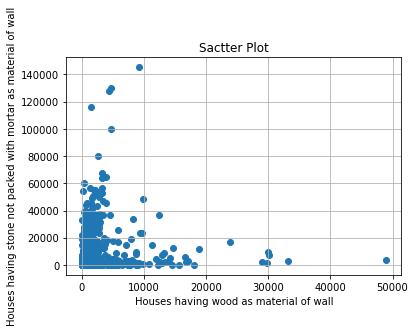

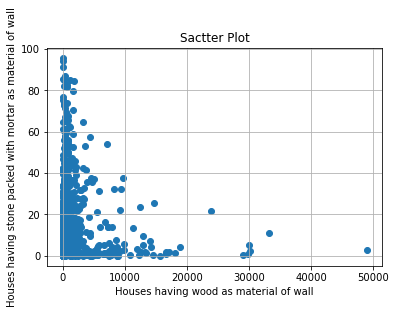

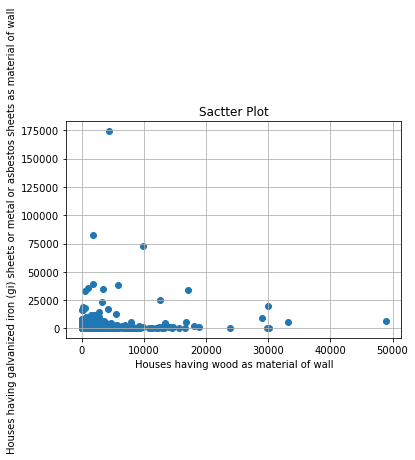

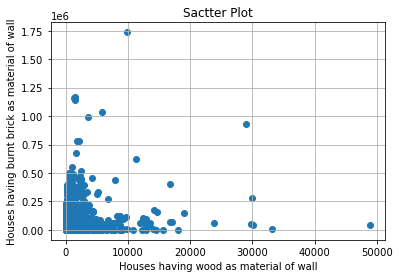

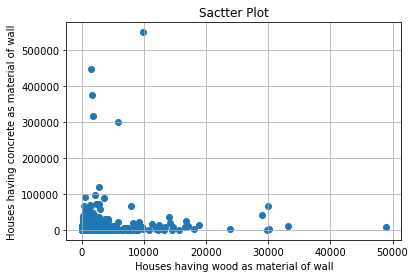

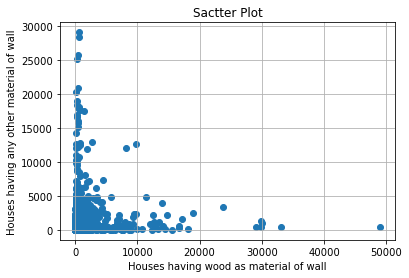

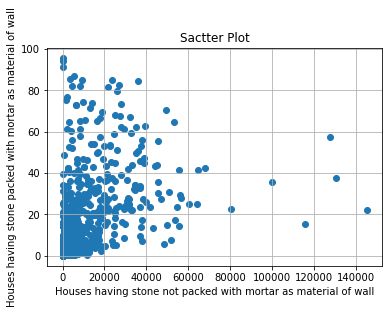

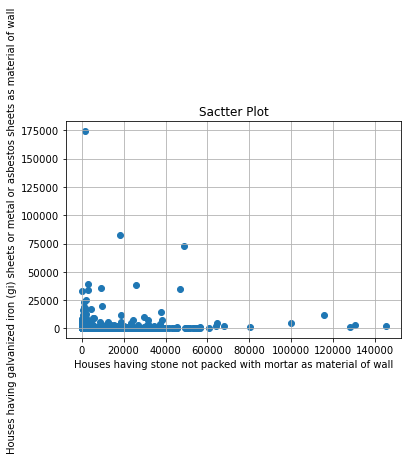

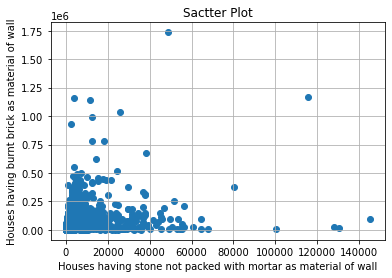

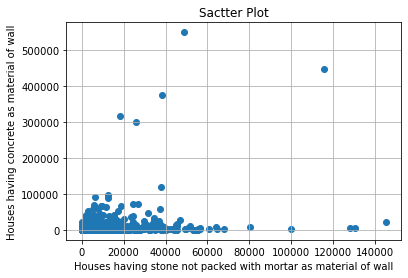

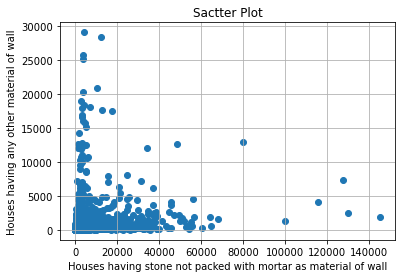

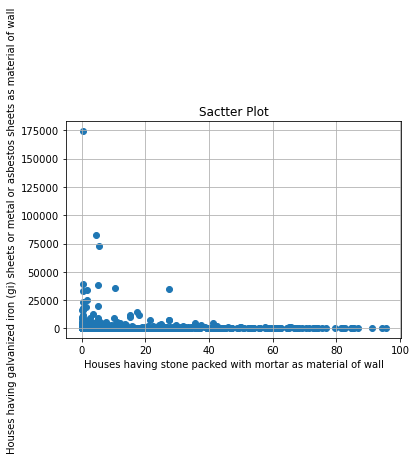

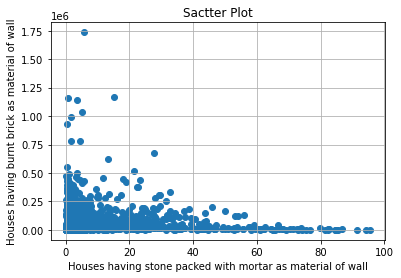

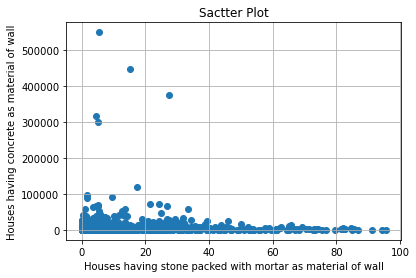

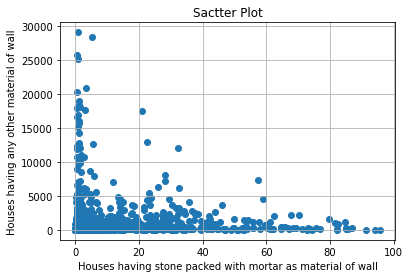

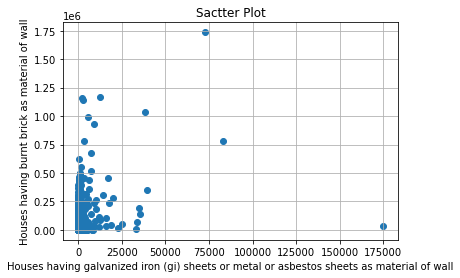

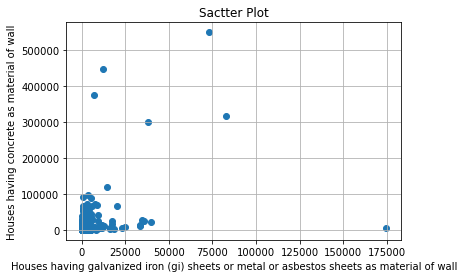

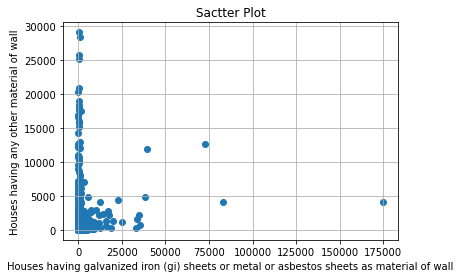

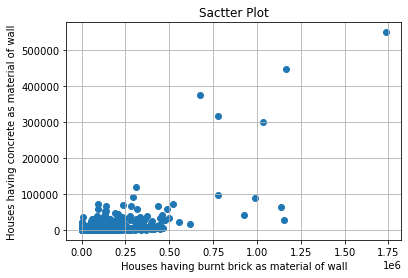

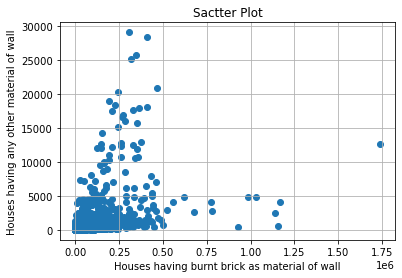

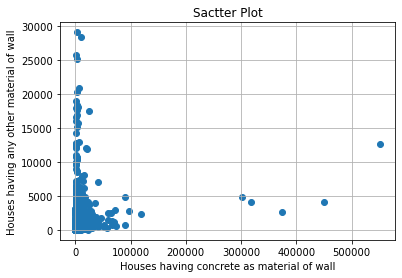

<AxesSubplot:>

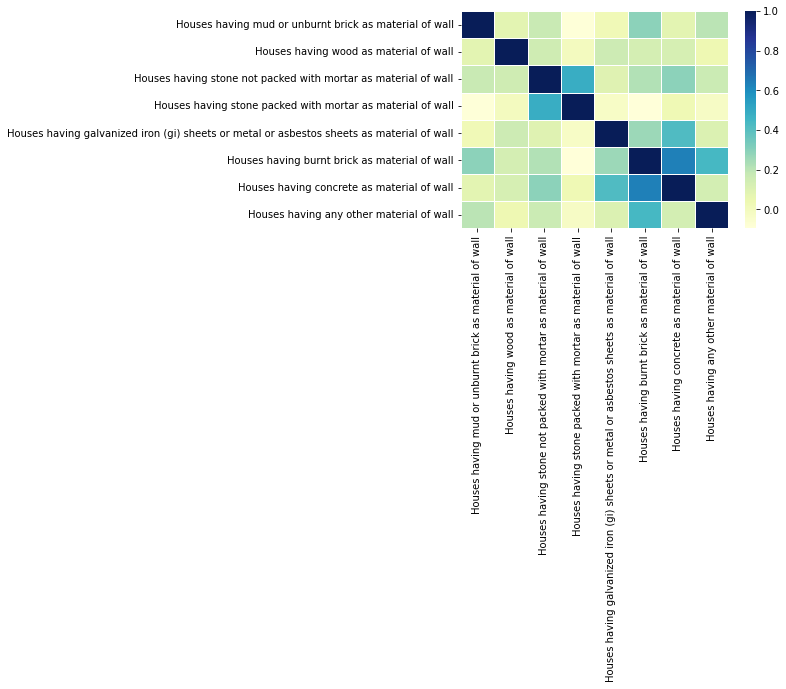

In [23]:
# 10.) For all pairs of continuous variables, plot the scatter plot and show color-coded correlation matrix

# Command for scatter plot for the continous (having decimal entires in this case) variables of our dataset.

plt.scatter(df['Number of census houses'], df['Houses having grass or thatch or bamboo etc. as material of wall'])

# Labelling of the axis and title
plt.xlabel('Number of census houses')
plt.ylabel('Houses having grass or thatch or bamboo etc. as material of wall')
plt.title('Sactter Plot')
plt.grid(True) # Command to add grid lines to our graph
plt.show()

plt.scatter(df['Number of census houses'], df['Houses having plastic or polythene as material of wall'])
plt.xlabel('Number of census houses')
plt.ylabel('Houses having plastic or polythene as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Number of census houses'], df['Houses having mud or unburnt brick as material of wall'])
plt.xlabel('Number of census houses')
plt.ylabel('Houses having mud or unburnt brick as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Number of census houses'], df['Houses having mud or unburnt brick as material of wall'])
plt.xlabel('Number of census houses')
plt.ylabel('Houses having mud or unburnt brick as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Number of census houses'], df['Houses having wood as material of wall'])
plt.xlabel('Number of census houses')
plt.ylabel('Houses having wood as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Number of census houses'], df['Houses having stone not packed with mortar as material of wall'])
plt.xlabel('Number of census houses')
plt.ylabel('Houses having stone not packed with mortar as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Number of census houses'], df['Houses having stone packed with mortar as material of wall'])
plt.xlabel('Number of census houses')
plt.ylabel('Houses having stone packed with mortar as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Number of census houses'], df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall'])
plt.xlabel('Number of census houses')
plt.ylabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Number of census houses'], df['Houses having burnt brick as material of wall'])
plt.xlabel('Number of census houses')
plt.ylabel('Houses having burnt brick as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Number of census houses'], df['Houses having concrete as material of wall'])
plt.xlabel('Number of census houses')
plt.ylabel('Houses having concrete as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Number of census houses'], df['Houses having any other material of wall'])
plt.xlabel('Number of census houses')
plt.ylabel('Houses having any other material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having grass or thatch or bamboo etc. as material of wall'], df['Houses having plastic or polythene as material of wall'])
plt.xlabel('Houses having grass or thatch or bamboo etc. as material of wall')
plt.ylabel('Houses having plastic or polythene as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having grass or thatch or bamboo etc. as material of wall'], df['Houses having mud or unburnt brick as material of wall'])
plt.xlabel('Houses having grass or thatch or bamboo etc. as material of wall')
plt.ylabel('Houses having mud or unburnt brick as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having grass or thatch or bamboo etc. as material of wall'], df['Houses having wood as material of wall'])
plt.xlabel('Houses having grass or thatch or bamboo etc. as material of wall')
plt.ylabel('Houses having wood as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having grass or thatch or bamboo etc. as material of wall'], df['Houses having stone not packed with mortar as material of wall'])
plt.xlabel('Houses having grass or thatch or bamboo etc. as material of wall')
plt.ylabel('Houses having stone not packed with mortar as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having grass or thatch or bamboo etc. as material of wall'], df['Houses having stone packed with mortar as material of wall'])
plt.xlabel('Houses having grass or thatch or bamboo etc. as material of wall')
plt.ylabel('Houses having stone packed with mortar as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having grass or thatch or bamboo etc. as material of wall'], df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall'])
plt.xlabel('Houses having grass or thatch or bamboo etc. as material of wall')
plt.ylabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having grass or thatch or bamboo etc. as material of wall'], df['Houses having burnt brick as material of wall'])
plt.xlabel('Houses having grass or thatch or bamboo etc. as material of wall')
plt.ylabel('Houses having burnt brick as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having grass or thatch or bamboo etc. as material of wall'], df['Houses having concrete as material of wall'])
plt.xlabel('Houses having grass or thatch or bamboo etc. as material of wall')
plt.ylabel('Houses having concrete as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having grass or thatch or bamboo etc. as material of wall'], df['Houses having any other material of wall'])
plt.xlabel('Houses having grass or thatch or bamboo etc. as material of wall')
plt.ylabel('Houses having any other material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having plastic or polythene as material of wall'], df['Houses having mud or unburnt brick as material of wall'])
plt.xlabel('Houses having plastic or polythene as material of wall')
plt.ylabel('Houses having mud or unburnt brick as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having plastic or polythene as material of wall'], df['Houses having wood as material of wall'])
plt.xlabel('Houses having plastic or polythene as material of wall')
plt.ylabel('Houses having wood as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having plastic or polythene as material of wall'], df['Houses having stone not packed with mortar as material of wall'])
plt.xlabel('Houses having plastic or polythene as material of wall')
plt.ylabel('Houses having stone not packed with mortar as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having plastic or polythene as material of wall'], df['Houses having stone packed with mortar as material of wall'])
plt.xlabel('Houses having plastic or polythene as material of wall')
plt.ylabel('Houses having stone packed with mortar as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having plastic or polythene as material of wall'], df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall'])
plt.xlabel('Houses having plastic or polythene as material of wall')
plt.ylabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having plastic or polythene as material of wall'], df['Houses having burnt brick as material of wall'])
plt.xlabel('Houses having plastic or polythene as material of wall')
plt.ylabel('Houses having burnt brick as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having plastic or polythene as material of wall'], df['Houses having concrete as material of wall'])
plt.xlabel('Houses having plastic or polythene as material of wall')
plt.ylabel('Houses having concrete as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having plastic or polythene as material of wall'], df['Houses having any other material of wall'])
plt.xlabel('Houses having plastic or polythene as material of wall')
plt.ylabel('Houses having any other material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having mud or unburnt brick as material of wall'], df['Houses having wood as material of wall'])
plt.xlabel('Houses having mud or unburnt brick as material of wall')
plt.ylabel('Houses having wood as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having mud or unburnt brick as material of wall'], df['Houses having stone not packed with mortar as material of wall'])
plt.xlabel('Houses having mud or unburnt brick as material of wall')
plt.ylabel('Houses having stone not packed with mortar as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having mud or unburnt brick as material of wall'], df['Houses having stone packed with mortar as material of wall'])
plt.xlabel('Houses having mud or unburnt brick as material of wall')
plt.ylabel('Houses having stone packed with mortar as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having mud or unburnt brick as material of wall'], df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall'])
plt.xlabel('Houses having mud or unburnt brick as material of wall')
plt.ylabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having mud or unburnt brick as material of wall'], df['Houses having burnt brick as material of wall'])
plt.xlabel('Houses having mud or unburnt brick as material of wall')
plt.ylabel('Houses having burnt brick as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having mud or unburnt brick as material of wall'], df['Houses having concrete as material of wall'])
plt.xlabel('Houses having mud or unburnt brick as material of wall')
plt.ylabel('Houses having concrete as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having mud or unburnt brick as material of wall'], df['Houses having any other material of wall'])
plt.xlabel('Houses having mud or unburnt brick as material of wall')
plt.ylabel('Houses having any other material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having wood as material of wall'], df['Houses having stone not packed with mortar as material of wall'])
plt.xlabel('Houses having wood as material of wall')
plt.ylabel('Houses having stone not packed with mortar as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having wood as material of wall'], df['Houses having stone packed with mortar as material of wall'])
plt.xlabel('Houses having wood as material of wall')
plt.ylabel('Houses having stone packed with mortar as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having wood as material of wall'], df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall'])
plt.xlabel('Houses having wood as material of wall')
plt.ylabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having wood as material of wall'], df['Houses having burnt brick as material of wall'])
plt.xlabel('Houses having wood as material of wall')
plt.ylabel('Houses having burnt brick as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having wood as material of wall'], df['Houses having concrete as material of wall'])
plt.xlabel('Houses having wood as material of wall')
plt.ylabel('Houses having concrete as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having wood as material of wall'], df['Houses having any other material of wall'])
plt.xlabel('Houses having wood as material of wall')
plt.ylabel('Houses having any other material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having stone not packed with mortar as material of wall'], df['Houses having stone packed with mortar as material of wall'])
plt.xlabel('Houses having stone not packed with mortar as material of wall')
plt.ylabel('Houses having stone packed with mortar as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having stone not packed with mortar as material of wall'], df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall'])
plt.xlabel('Houses having stone not packed with mortar as material of wall')
plt.ylabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having stone not packed with mortar as material of wall'], df['Houses having burnt brick as material of wall'])
plt.xlabel('Houses having stone not packed with mortar as material of wall')
plt.ylabel('Houses having burnt brick as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having stone not packed with mortar as material of wall'], df['Houses having concrete as material of wall'])
plt.xlabel('Houses having stone not packed with mortar as material of wall')
plt.ylabel('Houses having concrete as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having stone not packed with mortar as material of wall'], df['Houses having any other material of wall'])
plt.xlabel('Houses having stone not packed with mortar as material of wall')
plt.ylabel('Houses having any other material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having stone packed with mortar as material of wall'], df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall'])
plt.xlabel('Houses having stone packed with mortar as material of wall')
plt.ylabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having stone packed with mortar as material of wall'], df['Houses having burnt brick as material of wall'])
plt.xlabel('Houses having stone packed with mortar as material of wall')
plt.ylabel('Houses having burnt brick as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having stone packed with mortar as material of wall'], df['Houses having concrete as material of wall'])
plt.xlabel('Houses having stone packed with mortar as material of wall')
plt.ylabel('Houses having concrete as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having stone packed with mortar as material of wall'], df['Houses having any other material of wall'])
plt.xlabel('Houses having stone packed with mortar as material of wall')
plt.ylabel('Houses having any other material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall'], df['Houses having burnt brick as material of wall'])
plt.xlabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall')
plt.ylabel('Houses having burnt brick as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall'], df['Houses having concrete as material of wall'])
plt.xlabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall')
plt.ylabel('Houses having concrete as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall'], df['Houses having any other material of wall'])
plt.xlabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall')
plt.ylabel('Houses having any other material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having burnt brick as material of wall'], df['Houses having concrete as material of wall'])
plt.xlabel('Houses having burnt brick as material of wall')
plt.ylabel('Houses having concrete as material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having burnt brick as material of wall'], df['Houses having any other material of wall'])
plt.xlabel('Houses having burnt brick as material of wall')
plt.ylabel('Houses having any other material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

plt.scatter(df['Houses having concrete as material of wall'], df['Houses having any other material of wall'])
plt.xlabel('Houses having concrete as material of wall')
plt.ylabel('Houses having any other material of wall')
plt.title('Sactter Plot')
plt.grid(True)
plt.show()

# Creating new dataframe with the required features only.

df_new = df[['Number of census houses','Houses having grass or thatch or bamboo etc. as material of wall','Houses having plastic or polythene as material of wall','Houses having mud or unburnt brick as material of wall','Houses having wood as material of wall','Houses having stone not packed with mortar as material of wall','Houses having stone packed with mortar as material of wall','Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall','Houses having burnt brick as material of wall','Houses having concrete as material of wall','Houses having any other material of wall']]

# Applying the corelation matrix command.

corr = df_new.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,linewidths= 0.5, cmap="YlGnBu")

<BarContainer object of 2 artists>

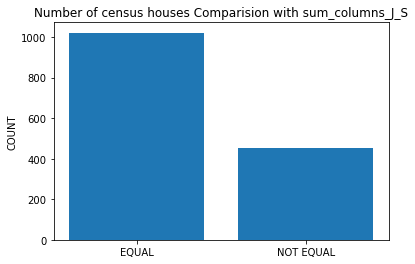

In [14]:
# 11.)Check if the sum of columns J through S matches with column I for all rows.

# Applying lamba function to create a column with sum of columns J through S.
df = df.assign(sum_columns_J_S=lambda x: (x['Houses having grass or thatch or bamboo etc. as material of wall'] + x['Houses having plastic or polythene as material of wall'] + x['Houses having mud or unburnt brick as material of wall'] + x['Houses having wood as material of wall'] + x['Houses having stone not packed with mortar as material of wall'] + x['Houses having stone packed with mortar as material of wall'] + x['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall'] + x['Houses having burnt brick as material of wall'] + x['Houses having concrete as material of wall'] + x['Houses having any other material of wall'] ))

# List to  maintain the 'Equal' and 'Not equal'.
L = []

# Initializing the counts for 'Equal' and 'Not Equal'

equal_count = 0 
not_equal_count = 0

# Apply the loop to check for the condition.

for i in range(df.shape[0]):
    if df['Number of census houses'][i] == df['sum_columns_J_S'][i]:
        equal_count = equal_count + 1
        L.append('Equal')
    else:
        not_equal_count = not_equal_count + 1
        L.append('Not Equal')

# Inserting the column of comparision.

df.insert(8, "Number of census houses Comparision with sum_columns_J_S", L, True)

# Visualizing the 'Equal count' and 'Not Equal count' using Bar Graph.
x = ["EQUAL", "NOT EQUAL"]
y = [equal_count, not_equal_count]
plt.ylabel('COUNT')
plt.title('Number of census houses Comparision with sum_columns_J_S')
plt.bar(x, y)

In [16]:
# 12.) Divide columns J through S by column I and store the in new columns as percent (multiply by 100).

# Inserting the required new columns in the dataframe and initializing them to 0.

df.insert(21, "Houses having grass or thatch or bamboo etc. as material of wall percentage", 0, True)
df.insert(22, "Houses having plastic or polythene as material of wall percentage", 0, True)
df.insert(23, "Houses having mud or unburnt brick as material of wall percentage", 0, True)
df.insert(24, "Houses having wood as material of wall percentage", 0, True)
df.insert(25, "Houses having stone not packed with mortar as material of wall percentage", 0, True)
df.insert(26, "Houses having stone packed with mortar as material of wall percentage", 0, True)
df.insert(27, "Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage", 0, True)
df.insert(28, "Houses having burnt brick as material of wall percentage", 0, True)
df.insert(29, "Houses having concrete as material of wall percentage", 0, True)
df.insert(30, "Houses having any other material of wall percentage", 0, True)

# Apply the loop to find the respective percentage.

for i in range(df.shape[0]):
    try:
        df['Houses having grass or thatch or bamboo etc. as material of wall percentage'][i] = float((df['Houses having grass or thatch or bamboo etc. as material of wall'][i]/df['Number of census houses'][i])*100)
    except:
        df['Houses having grass or thatch or bamboo etc. as material of wall percentage'][i] = 0.0 
        
    try:
        df['Houses having plastic or polythene as material of wall percentage'][i] = float((df['Houses having plastic or polythene as material of wall'][i]/df['Number of census houses'][i])*100)
    except:
        df['Houses having plastic or polythene as material of wall percentage'][i] = 0.0
        
    try:
        df['Houses having mud or unburnt brick as material of wall percentage'][i] = float((df['Houses having mud or unburnt brick as material of wall'][i]/df['Number of census houses'][i])*100)
    except:
        df['Houses having mud or unburnt brick as material of wall percentage'][i] = 0.0
        
    try:
        df['Houses having wood as material of wall percentage'][i] = float((df['Houses having wood as material of wall'][i]/df['Number of census houses'][i])*100)
    except:
        df['Houses having wood as material of wall percentage'][i] = 0.0
        
    try:
        df['Houses having stone not packed with mortar as material of wall percentage'][i] = float((df['Houses having stone not packed with mortar as material of wall'][i]/df['Number of census houses'][i])*100)
    except:
        df['Houses having stone not packed with mortar as material of wall percentage'][i] = 0.0
        
    try:
        df['Houses having stone packed with mortar as material of wall'][i] = float((df['Houses having stone packed with mortar as material of wall'][i]/df['Number of census houses'][i])*100)
    except:
        df['Houses having stone packed with mortar as material of wall'][i] = 0.0
        
    try:
        df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage'][i] = float((df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall'][i]/df['Number of census houses'][i])*100)
    except:
        df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage'][i] = 0.0
        
    try:
        df['Houses having burnt brick as material of wall percentage'][i] = float((df['Houses having burnt brick as material of wall'][i]/df['Number of census houses'][i])*100)
    except:
        df['Houses having burnt brick as material of wall percentage'][i] = 0.0
        
    try:
        df['Houses having concrete as material of wall percentage'][i] = float((df['Houses having concrete as material of wall'][i]/df['Number of census houses'][i])*100)
    except:
        df['Houses having concrete as material of wall percentage'][i] = 0.0
    
    try:
        df['Houses having any other material of wall percentage'][i] = float((df['Houses having any other material of wall'][i]/df['Number of census houses'][i])*100)
    except:
        df['Houses having any other material of wall percentage'][i] = 0.0
    
    

<Figure size 3600x3600 with 0 Axes>

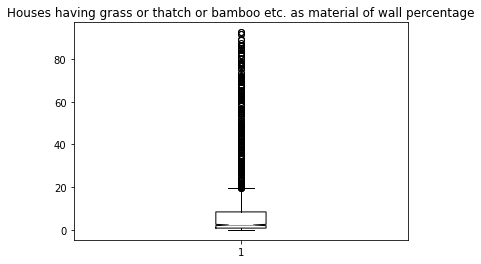

<Figure size 3600x3600 with 0 Axes>

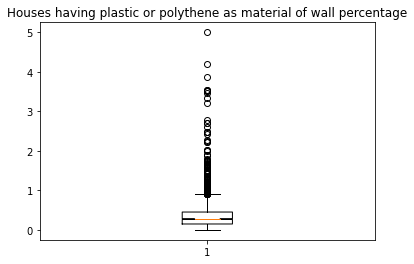

<Figure size 3600x3600 with 0 Axes>

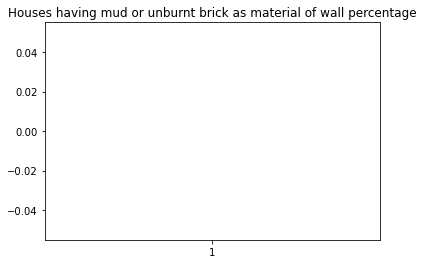

<Figure size 3600x3600 with 0 Axes>

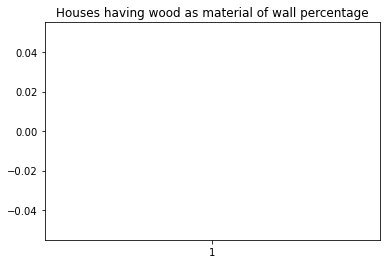

<Figure size 3600x3600 with 0 Axes>

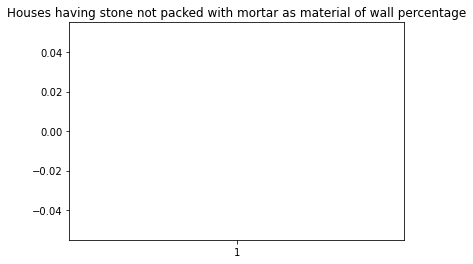

<Figure size 3600x3600 with 0 Axes>

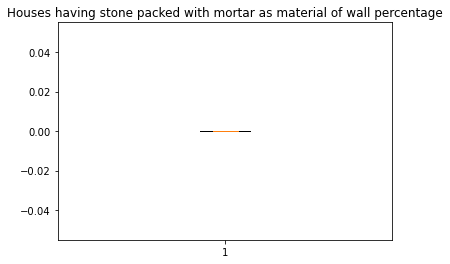

<Figure size 3600x3600 with 0 Axes>

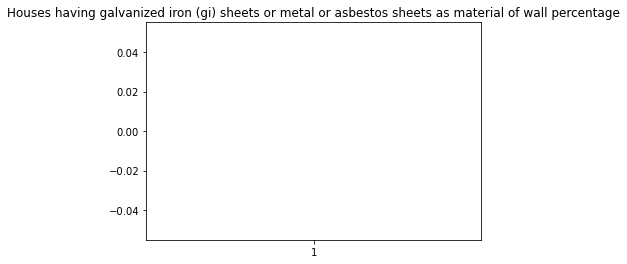

<Figure size 3600x3600 with 0 Axes>

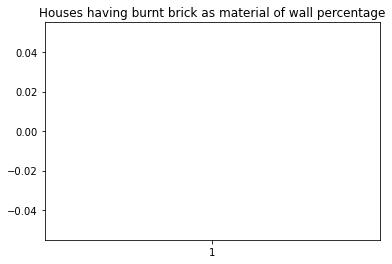

<Figure size 3600x3600 with 0 Axes>

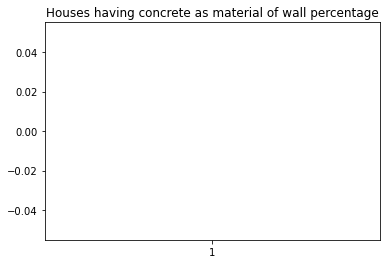

<Figure size 3600x3600 with 0 Axes>

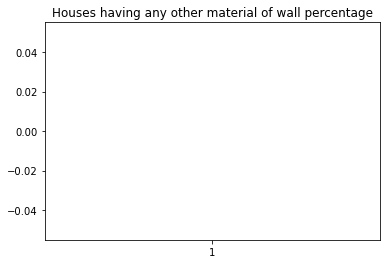

In [17]:
# 13.) For the new columns, show box and whiskers plot.

fig = plt.figure(figsize =(50, 50)) # Specifing the frame size.
fig1, ax1 = plt.subplots() # Setting of axis.
ax1.set_title('Houses having grass or thatch or bamboo etc. as material of wall percentage')
ax1.boxplot(df['Houses having grass or thatch or bamboo etc. as material of wall percentage'],notch=True) # Command for the boxplot
plt.show()

fig = plt.figure(figsize =(50, 50))
fig1, ax1 = plt.subplots()
ax1.set_title('Houses having plastic or polythene as material of wall percentage')
ax1.boxplot(df['Houses having plastic or polythene as material of wall percentage'],notch=True)
plt.show()

fig = plt.figure(figsize =(50, 50))
fig1, ax1 = plt.subplots()
ax1.set_title('Houses having mud or unburnt brick as material of wall percentage')
ax1.boxplot(df['Houses having mud or unburnt brick as material of wall percentage'],notch=True)
plt.show()

fig = plt.figure(figsize =(50, 50))
fig1, ax1 = plt.subplots()
ax1.set_title('Houses having wood as material of wall percentage')
ax1.boxplot(df['Houses having wood as material of wall percentage'],notch=True)
plt.show()

fig = plt.figure(figsize =(50, 50))
fig1, ax1 = plt.subplots()
ax1.set_title('Houses having stone not packed with mortar as material of wall percentage')
ax1.boxplot(df['Houses having stone not packed with mortar as material of wall percentage'],notch=True)
plt.show()

fig = plt.figure(figsize =(50, 50))
fig1, ax1 = plt.subplots()
ax1.set_title('Houses having stone packed with mortar as material of wall percentage')
ax1.boxplot(df['Houses having stone packed with mortar as material of wall percentage'],notch=True)
plt.show()

fig = plt.figure(figsize =(50, 50))
fig1, ax1 = plt.subplots()
ax1.set_title('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage')
ax1.boxplot(df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage'],notch=True)
plt.show()

fig = plt.figure(figsize =(50, 50))
fig1, ax1 = plt.subplots()
ax1.set_title('Houses having burnt brick as material of wall percentage')
ax1.boxplot(df['Houses having burnt brick as material of wall percentage'],notch=True)
plt.show()

fig = plt.figure(figsize =(50, 50))
fig1, ax1 = plt.subplots()
ax1.set_title('Houses having concrete as material of wall percentage')
ax1.boxplot(df['Houses having concrete as material of wall percentage'],notch=True)
plt.show()

fig = plt.figure(figsize =(50, 50))
fig1, ax1 = plt.subplots()
ax1.set_title('Houses having any other material of wall percentage')
ax1.boxplot(df['Houses having any other material of wall percentage'],notch=True)
plt.show()

Text(0.5, 1.0, 'Houses having any other material of wall percentage, rural versus urban')

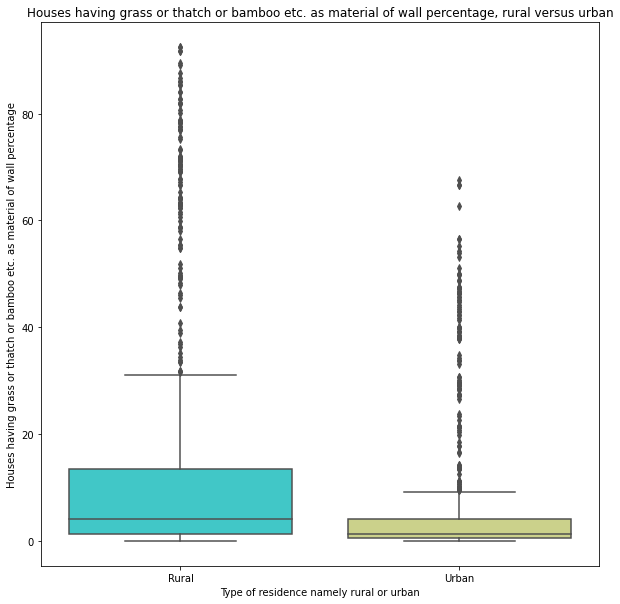

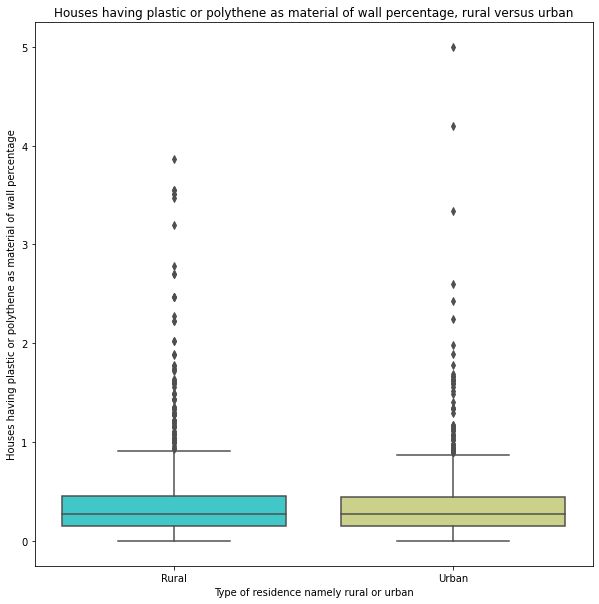

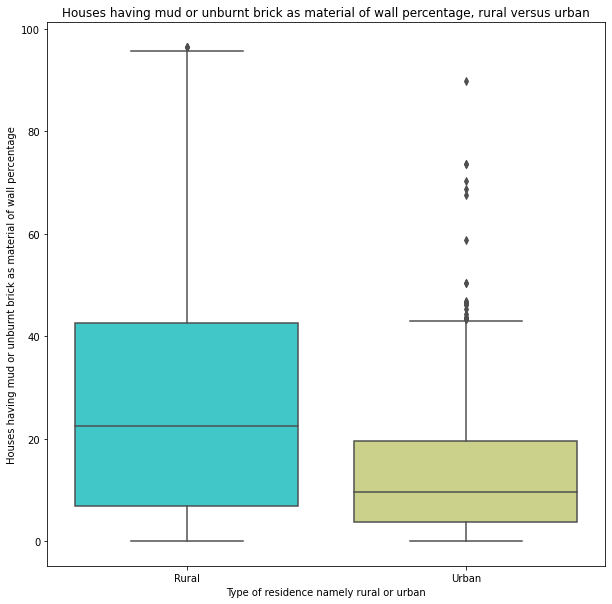

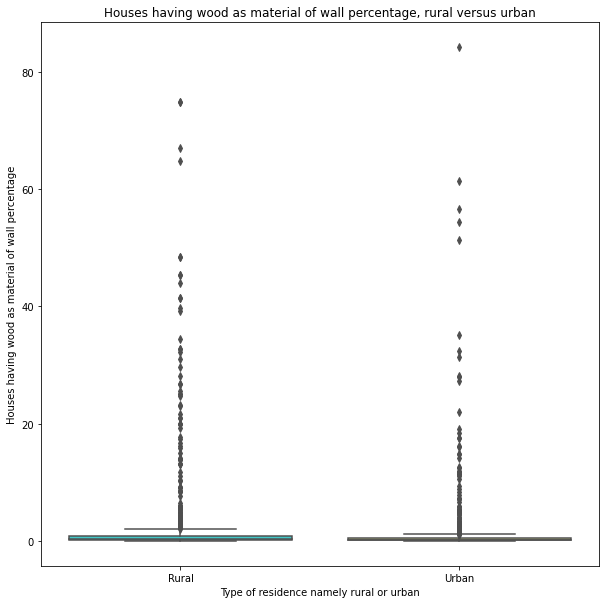

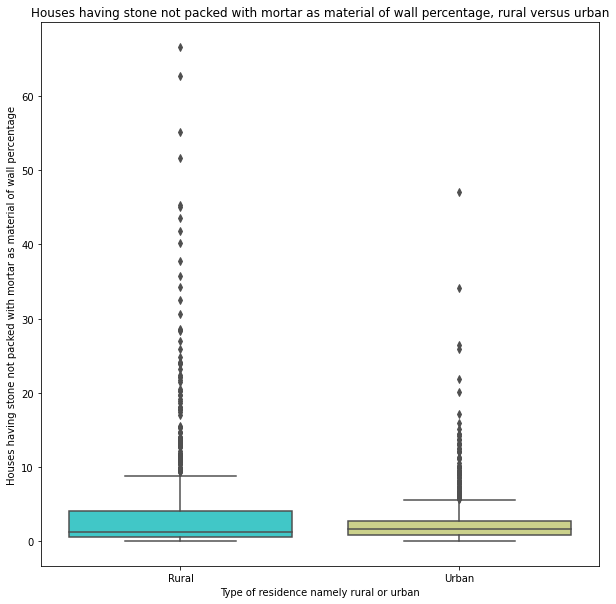

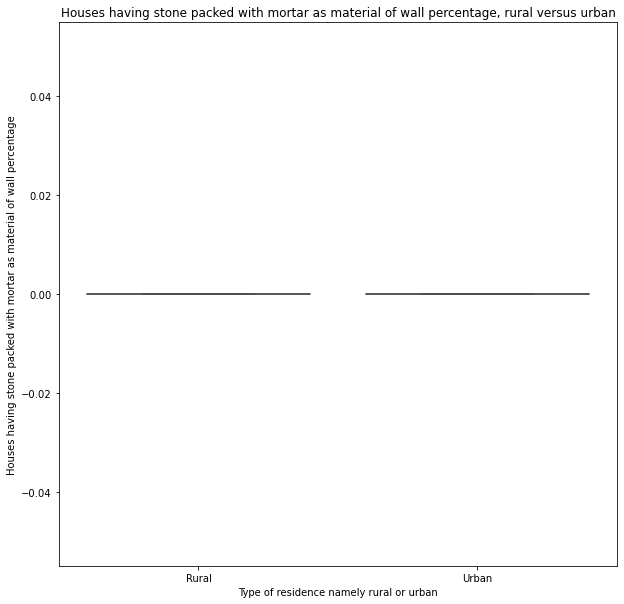

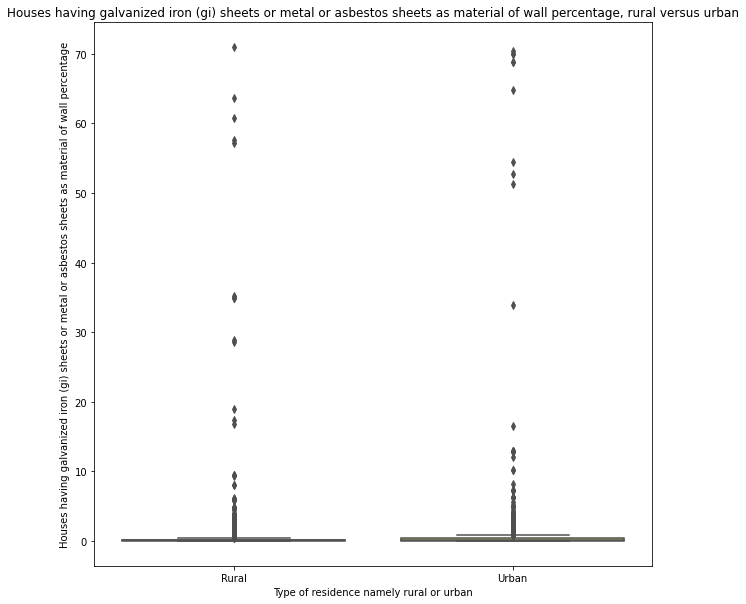

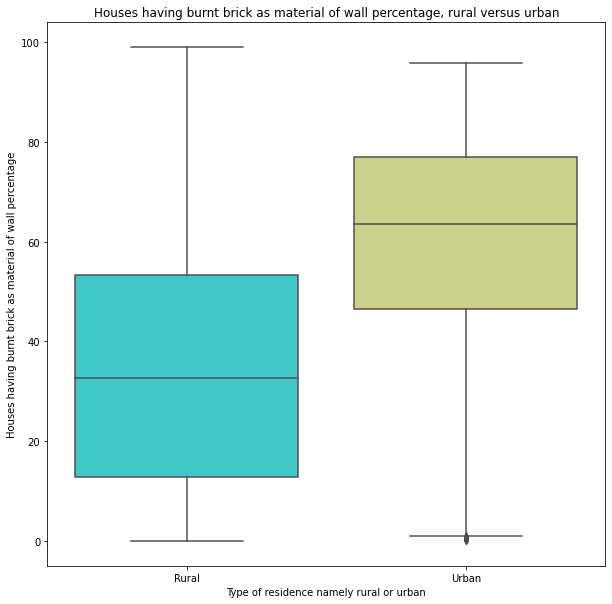

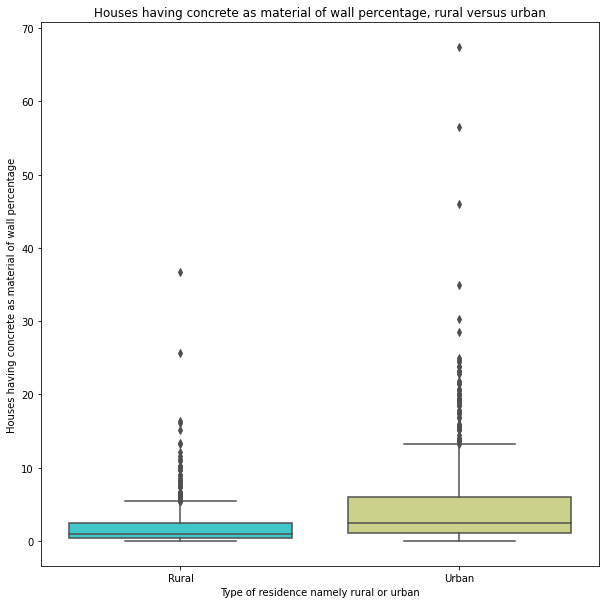

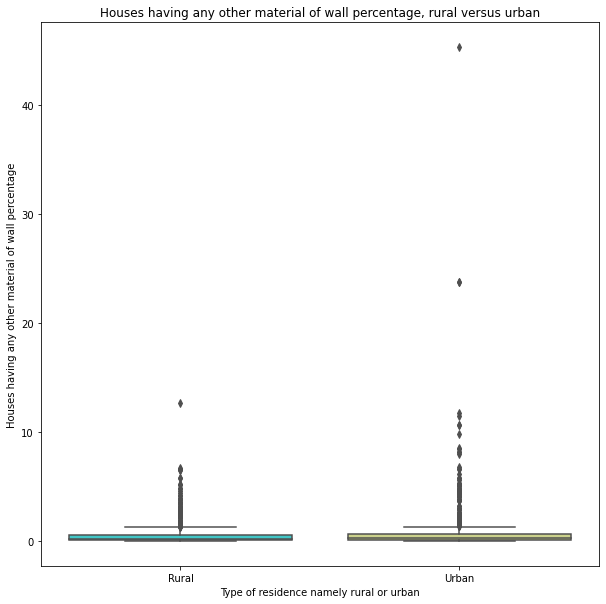

In [18]:
# 14.) For the new columns, show box and whiskers plot by rural versus urban.

plt.figure(figsize=(10,10))
sns.boxplot(x='Type of residence namely rural or urban',y='Houses having grass or thatch or bamboo etc. as material of wall percentage',data=df, palette='rainbow') # Specifying the variable w.r.t which bosxplot is to be created in the command.
plt.title("Houses having grass or thatch or bamboo etc. as material of wall percentage, rural versus urban")

plt.figure(figsize=(10,10))
sns.boxplot(x='Type of residence namely rural or urban',y='Houses having plastic or polythene as material of wall percentage',data=df, palette='rainbow')
plt.title("Houses having plastic or polythene as material of wall percentage, rural versus urban")

plt.figure(figsize=(10,10))
sns.boxplot(x='Type of residence namely rural or urban',y='Houses having mud or unburnt brick as material of wall percentage',data=df, palette='rainbow')
plt.title("Houses having mud or unburnt brick as material of wall percentage, rural versus urban")

plt.figure(figsize=(10,10))
sns.boxplot(x='Type of residence namely rural or urban',y='Houses having wood as material of wall percentage',data=df, palette='rainbow')
plt.title("Houses having wood as material of wall percentage, rural versus urban")

plt.figure(figsize=(10,10))
sns.boxplot(x='Type of residence namely rural or urban',y='Houses having stone not packed with mortar as material of wall percentage',data=df, palette='rainbow')
plt.title("Houses having stone not packed with mortar as material of wall percentage, rural versus urban")

plt.figure(figsize=(10,10))
sns.boxplot(x='Type of residence namely rural or urban',y='Houses having stone packed with mortar as material of wall percentage',data=df, palette='rainbow')
plt.title("Houses having stone packed with mortar as material of wall percentage, rural versus urban")

plt.figure(figsize=(10,10))
sns.boxplot(x='Type of residence namely rural or urban',y='Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage',data=df, palette='rainbow')
plt.title("Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage, rural versus urban")

plt.figure(figsize=(10,10))
sns.boxplot(x='Type of residence namely rural or urban',y='Houses having burnt brick as material of wall percentage',data=df, palette='rainbow')
plt.title("Houses having burnt brick as material of wall percentage, rural versus urban")

plt.figure(figsize=(10,10))
sns.boxplot(x='Type of residence namely rural or urban',y='Houses having concrete as material of wall percentage',data=df, palette='rainbow')
plt.title("Houses having concrete as material of wall percentage, rural versus urban")

plt.figure(figsize=(10,10))
sns.boxplot(x='Type of residence namely rural or urban',y='Houses having any other material of wall percentage',data=df, palette='rainbow')
plt.title("Houses having any other material of wall percentage, rural versus urban")

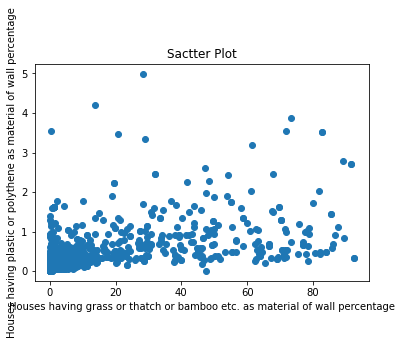

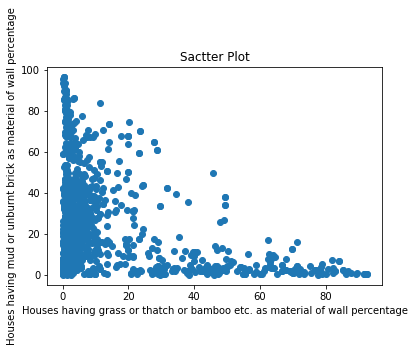

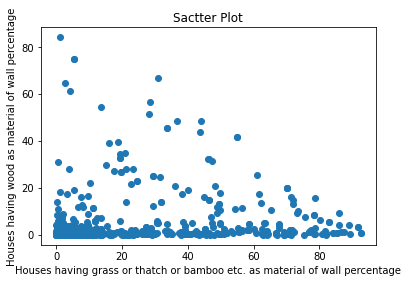

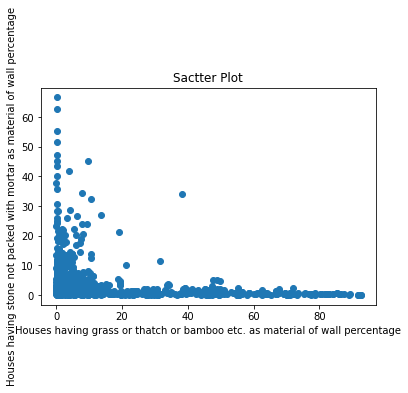

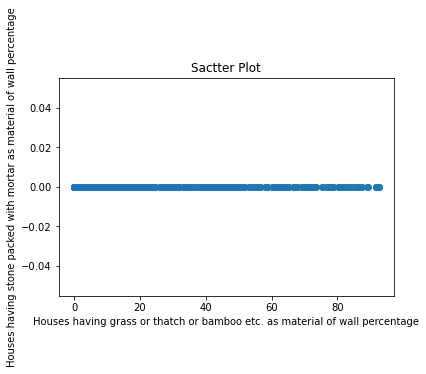

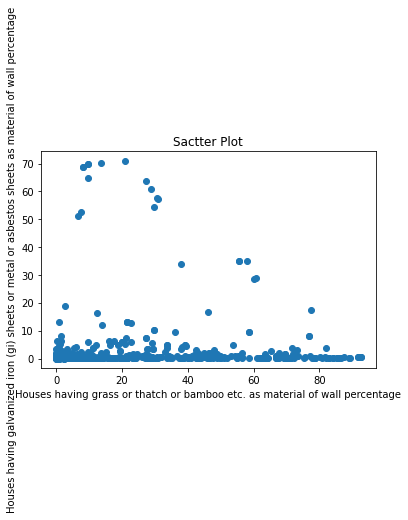

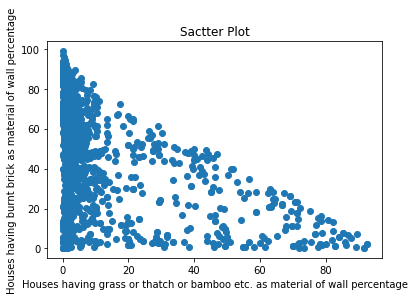

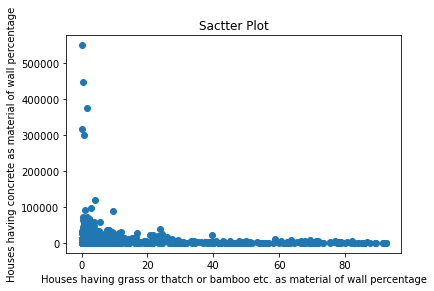

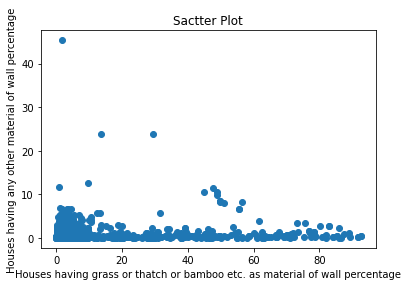

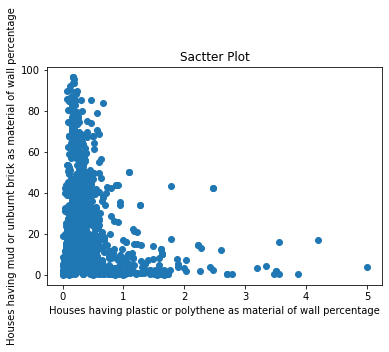

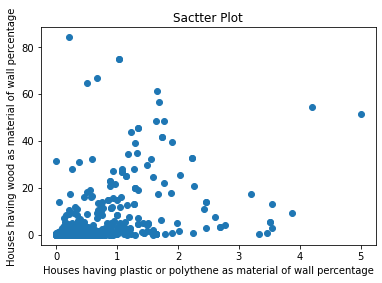

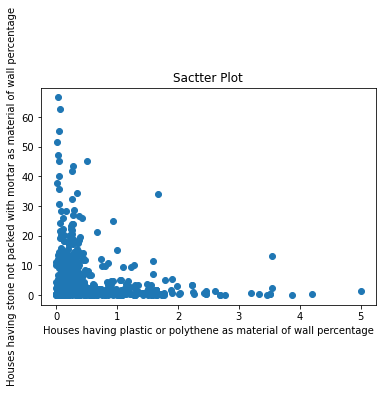

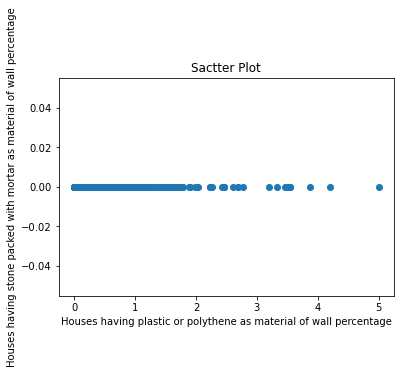

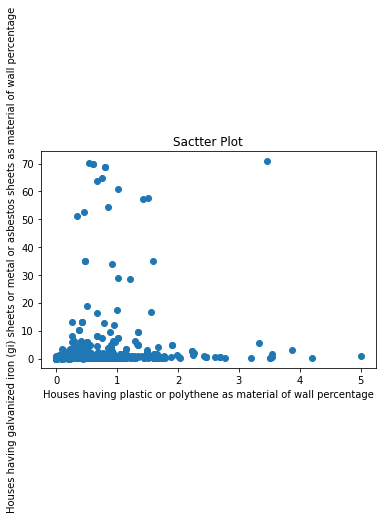

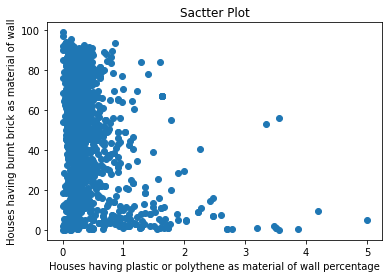

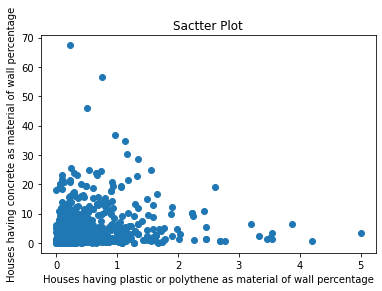

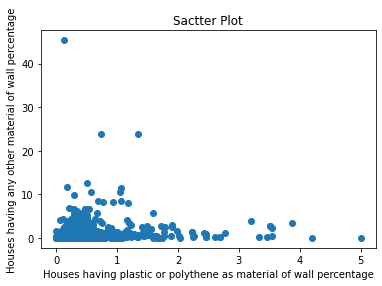

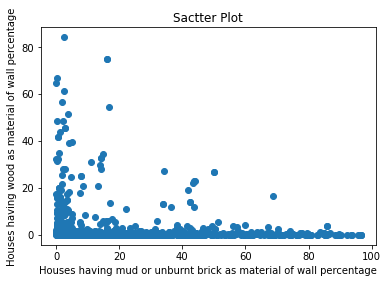

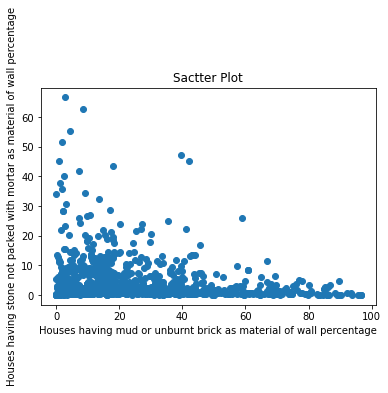

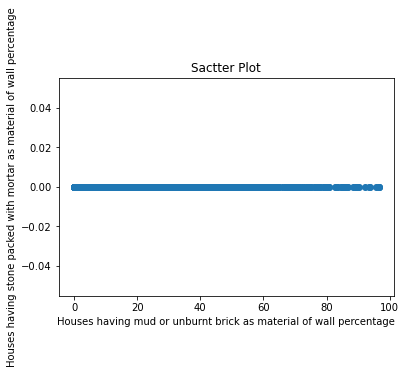

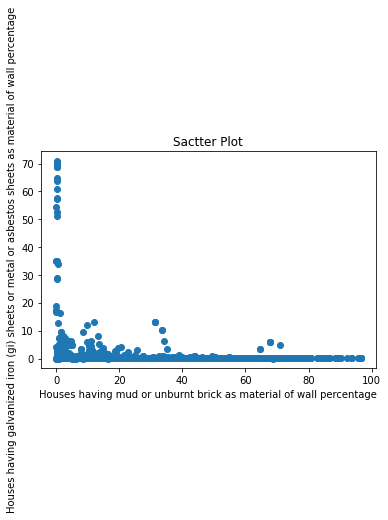

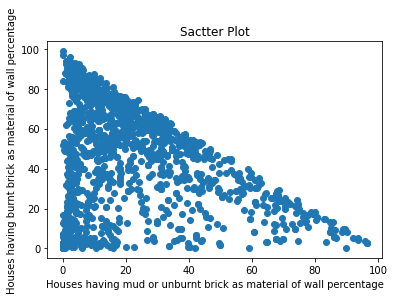

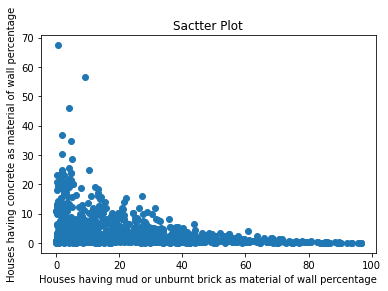

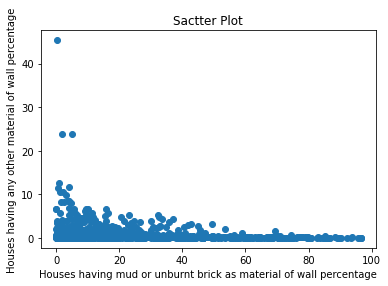

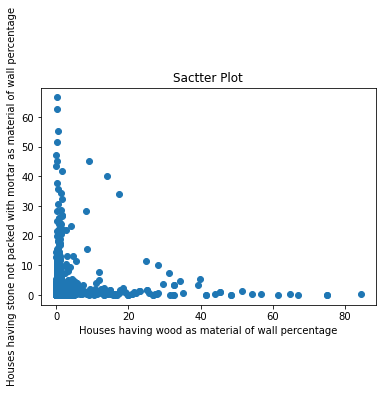

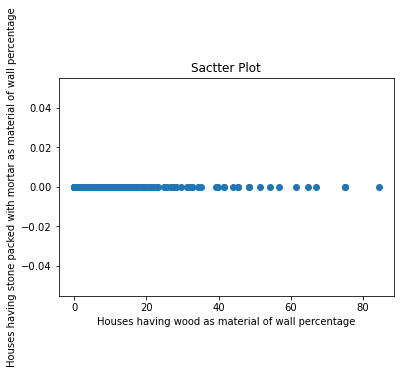

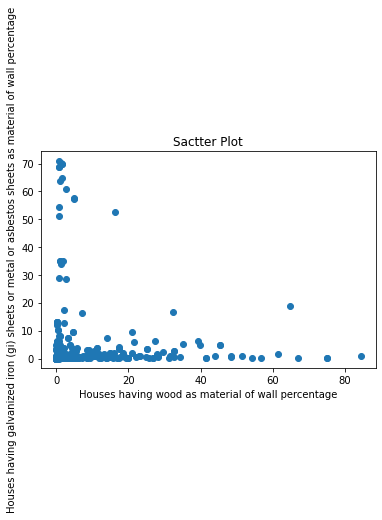

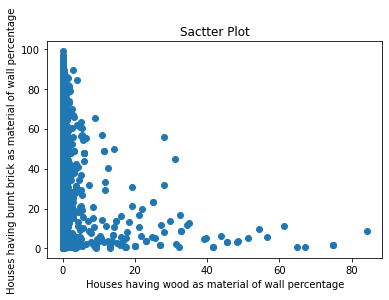

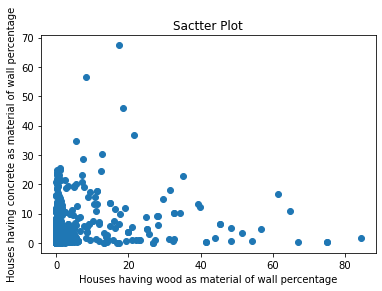

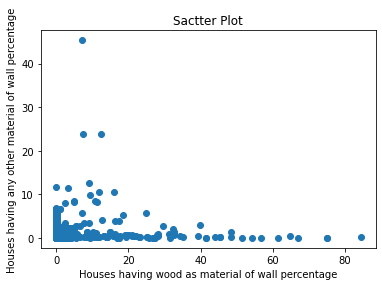

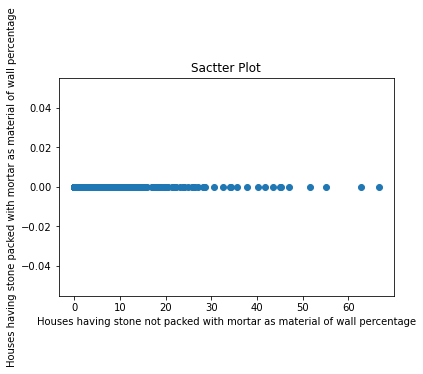

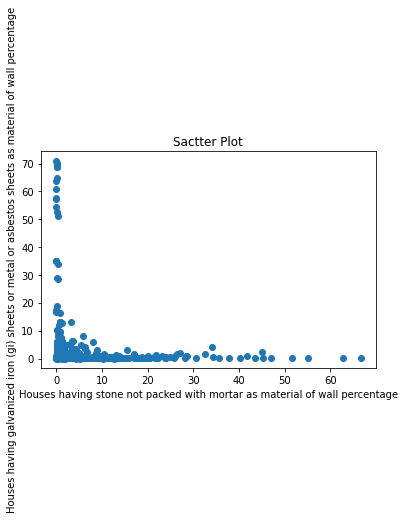

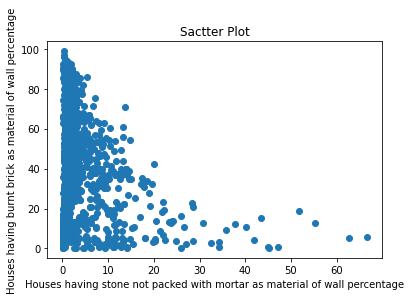

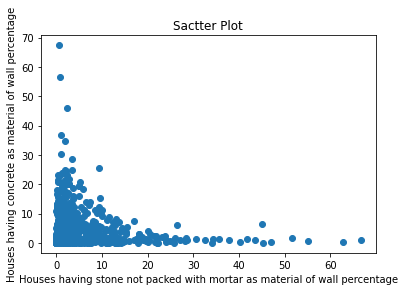

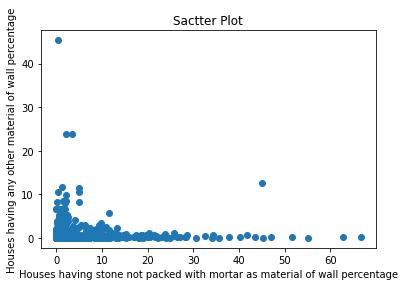

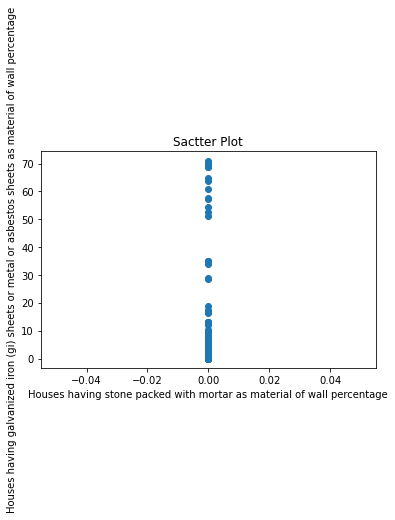

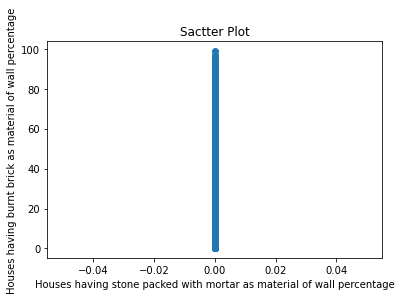

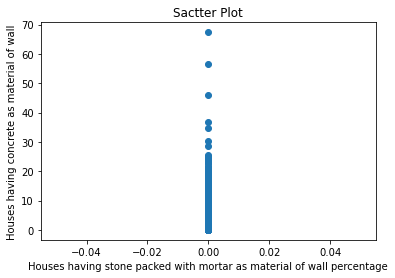

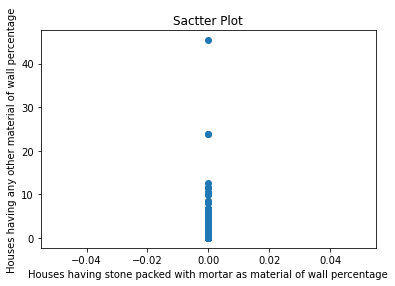

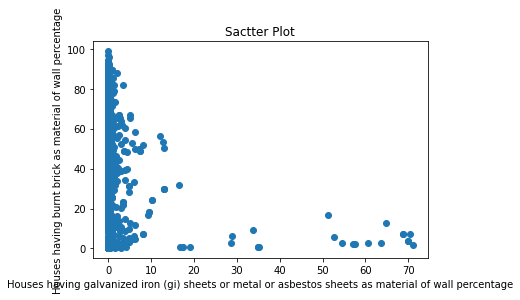

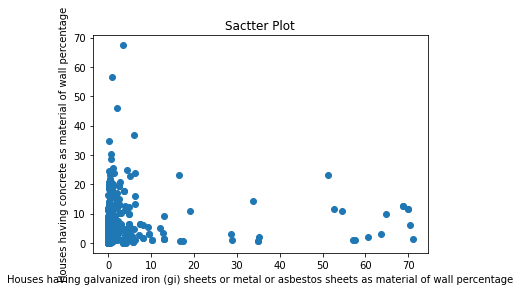

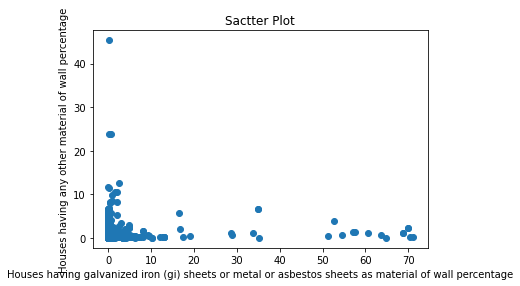

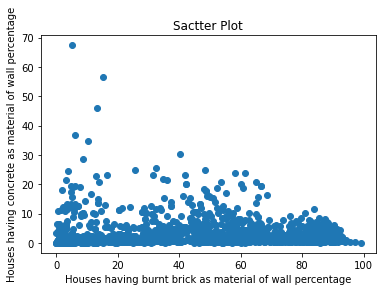

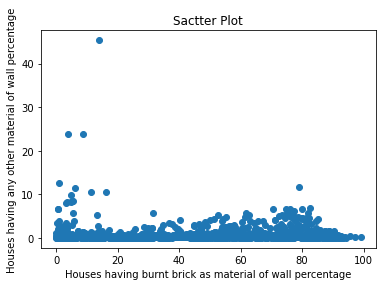

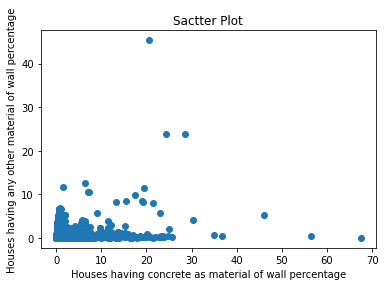

<AxesSubplot:>

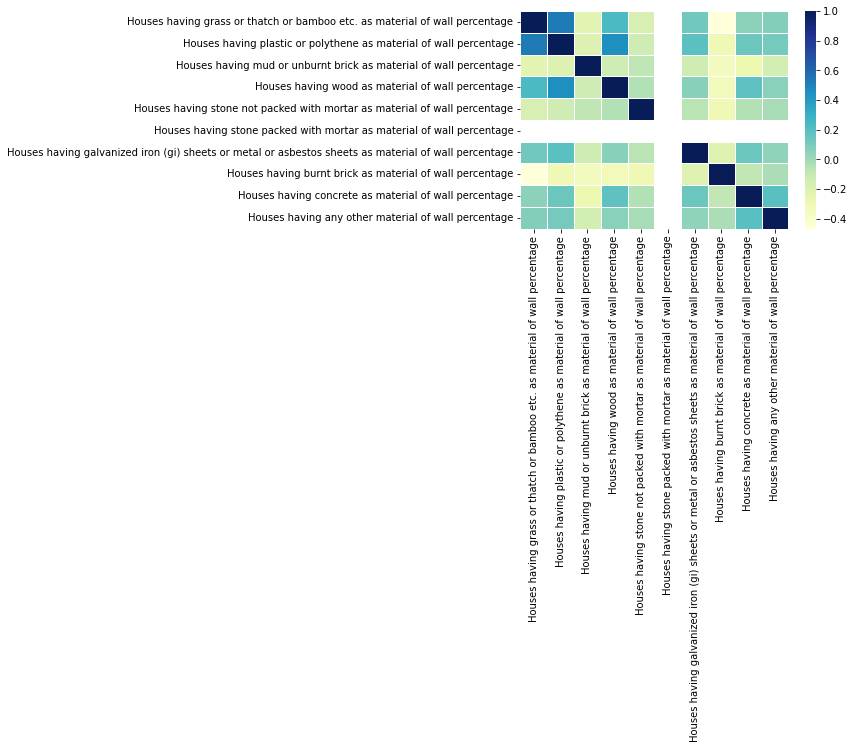

In [19]:
# 15.) For the new columns, plot pair-wise scatter plots and correlation matrix


plt.scatter(df['Houses having grass or thatch or bamboo etc. as material of wall percentage'], df['Houses having plastic or polythene as material of wall percentage'])
plt.xlabel('Houses having grass or thatch or bamboo etc. as material of wall percentage')
plt.ylabel('Houses having plastic or polythene as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having grass or thatch or bamboo etc. as material of wall percentage'], df['Houses having mud or unburnt brick as material of wall percentage'])
plt.xlabel('Houses having grass or thatch or bamboo etc. as material of wall percentage')
plt.ylabel('Houses having mud or unburnt brick as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having grass or thatch or bamboo etc. as material of wall percentage'], df['Houses having wood as material of wall percentage'])
plt.xlabel('Houses having grass or thatch or bamboo etc. as material of wall percentage')
plt.ylabel('Houses having wood as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having grass or thatch or bamboo etc. as material of wall percentage'], df['Houses having stone not packed with mortar as material of wall percentage'])
plt.xlabel('Houses having grass or thatch or bamboo etc. as material of wall percentage')
plt.ylabel('Houses having stone not packed with mortar as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having grass or thatch or bamboo etc. as material of wall percentage'], df['Houses having stone packed with mortar as material of wall percentage'])
plt.xlabel('Houses having grass or thatch or bamboo etc. as material of wall percentage')
plt.ylabel('Houses having stone packed with mortar as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having grass or thatch or bamboo etc. as material of wall percentage'], df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage'])
plt.xlabel('Houses having grass or thatch or bamboo etc. as material of wall percentage')
plt.ylabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having grass or thatch or bamboo etc. as material of wall percentage'], df['Houses having burnt brick as material of wall percentage'])
plt.xlabel('Houses having grass or thatch or bamboo etc. as material of wall percentage')
plt.ylabel('Houses having burnt brick as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having grass or thatch or bamboo etc. as material of wall percentage'], df['Houses having concrete as material of wall'])
plt.xlabel('Houses having grass or thatch or bamboo etc. as material of wall percentage')
plt.ylabel('Houses having concrete as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having grass or thatch or bamboo etc. as material of wall percentage'], df['Houses having any other material of wall percentage'])
plt.xlabel('Houses having grass or thatch or bamboo etc. as material of wall percentage')
plt.ylabel('Houses having any other material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having plastic or polythene as material of wall percentage'], df['Houses having mud or unburnt brick as material of wall percentage'])
plt.xlabel('Houses having plastic or polythene as material of wall percentage')
plt.ylabel('Houses having mud or unburnt brick as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having plastic or polythene as material of wall percentage'], df['Houses having wood as material of wall percentage'])
plt.xlabel('Houses having plastic or polythene as material of wall percentage')
plt.ylabel('Houses having wood as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having plastic or polythene as material of wall percentage'], df['Houses having stone not packed with mortar as material of wall percentage'])
plt.xlabel('Houses having plastic or polythene as material of wall percentage')
plt.ylabel('Houses having stone not packed with mortar as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having plastic or polythene as material of wall percentage'], df['Houses having stone packed with mortar as material of wall percentage'])
plt.xlabel('Houses having plastic or polythene as material of wall percentage')
plt.ylabel('Houses having stone packed with mortar as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having plastic or polythene as material of wall percentage'], df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage'])
plt.xlabel('Houses having plastic or polythene as material of wall percentage')
plt.ylabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having plastic or polythene as material of wall percentage'], df['Houses having burnt brick as material of wall percentage'])
plt.xlabel('Houses having plastic or polythene as material of wall percentage')
plt.ylabel('Houses having burnt brick as material of wall')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having plastic or polythene as material of wall percentage'], df['Houses having concrete as material of wall percentage'])
plt.xlabel('Houses having plastic or polythene as material of wall percentage')
plt.ylabel('Houses having concrete as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having plastic or polythene as material of wall percentage'], df['Houses having any other material of wall percentage'])
plt.xlabel('Houses having plastic or polythene as material of wall percentage')
plt.ylabel('Houses having any other material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having mud or unburnt brick as material of wall percentage'], df['Houses having wood as material of wall percentage'])
plt.xlabel('Houses having mud or unburnt brick as material of wall percentage')
plt.ylabel('Houses having wood as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having mud or unburnt brick as material of wall percentage'], df['Houses having stone not packed with mortar as material of wall percentage'])
plt.xlabel('Houses having mud or unburnt brick as material of wall percentage')
plt.ylabel('Houses having stone not packed with mortar as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having mud or unburnt brick as material of wall percentage'], df['Houses having stone packed with mortar as material of wall percentage'])
plt.xlabel('Houses having mud or unburnt brick as material of wall percentage')
plt.ylabel('Houses having stone packed with mortar as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having mud or unburnt brick as material of wall percentage'], df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage'])
plt.xlabel('Houses having mud or unburnt brick as material of wall percentage')
plt.ylabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having mud or unburnt brick as material of wall percentage'], df['Houses having burnt brick as material of wall percentage'])
plt.xlabel('Houses having mud or unburnt brick as material of wall percentage')
plt.ylabel('Houses having burnt brick as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having mud or unburnt brick as material of wall percentage'], df['Houses having concrete as material of wall percentage'])
plt.xlabel('Houses having mud or unburnt brick as material of wall percentage')
plt.ylabel('Houses having concrete as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having mud or unburnt brick as material of wall percentage'], df['Houses having any other material of wall percentage'])
plt.xlabel('Houses having mud or unburnt brick as material of wall percentage')
plt.ylabel('Houses having any other material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having wood as material of wall percentage'], df['Houses having stone not packed with mortar as material of wall percentage'])
plt.xlabel('Houses having wood as material of wall percentage')
plt.ylabel('Houses having stone not packed with mortar as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having wood as material of wall percentage'], df['Houses having stone packed with mortar as material of wall percentage'])
plt.xlabel('Houses having wood as material of wall percentage')
plt.ylabel('Houses having stone packed with mortar as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having wood as material of wall percentage'], df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage'])
plt.xlabel('Houses having wood as material of wall percentage')
plt.ylabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having wood as material of wall percentage'], df['Houses having burnt brick as material of wall percentage'])
plt.xlabel('Houses having wood as material of wall percentage')
plt.ylabel('Houses having burnt brick as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having wood as material of wall percentage'], df['Houses having concrete as material of wall percentage'])
plt.xlabel('Houses having wood as material of wall percentage')
plt.ylabel('Houses having concrete as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having wood as material of wall percentage'], df['Houses having any other material of wall percentage'])
plt.xlabel('Houses having wood as material of wall percentage')
plt.ylabel('Houses having any other material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having stone not packed with mortar as material of wall percentage'], df['Houses having stone packed with mortar as material of wall percentage'])
plt.xlabel('Houses having stone not packed with mortar as material of wall percentage')
plt.ylabel('Houses having stone packed with mortar as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having stone not packed with mortar as material of wall percentage'], df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage'])
plt.xlabel('Houses having stone not packed with mortar as material of wall percentage')
plt.ylabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having stone not packed with mortar as material of wall percentage'], df['Houses having burnt brick as material of wall percentage'])
plt.xlabel('Houses having stone not packed with mortar as material of wall percentage')
plt.ylabel('Houses having burnt brick as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having stone not packed with mortar as material of wall percentage'], df['Houses having concrete as material of wall percentage'])
plt.xlabel('Houses having stone not packed with mortar as material of wall percentage')
plt.ylabel('Houses having concrete as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having stone not packed with mortar as material of wall percentage'], df['Houses having any other material of wall percentage'])
plt.xlabel('Houses having stone not packed with mortar as material of wall percentage')
plt.ylabel('Houses having any other material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having stone packed with mortar as material of wall percentage'], df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage'])
plt.xlabel('Houses having stone packed with mortar as material of wall percentage')
plt.ylabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having stone packed with mortar as material of wall percentage'], df['Houses having burnt brick as material of wall percentage'])
plt.xlabel('Houses having stone packed with mortar as material of wall percentage')
plt.ylabel('Houses having burnt brick as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having stone packed with mortar as material of wall percentage'], df['Houses having concrete as material of wall percentage'])
plt.xlabel('Houses having stone packed with mortar as material of wall percentage')
plt.ylabel('Houses having concrete as material of wall')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having stone packed with mortar as material of wall percentage'], df['Houses having any other material of wall percentage'])
plt.xlabel('Houses having stone packed with mortar as material of wall percentage')
plt.ylabel('Houses having any other material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage'], df['Houses having burnt brick as material of wall percentage'])
plt.xlabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage')
plt.ylabel('Houses having burnt brick as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage'], df['Houses having concrete as material of wall percentage'])
plt.xlabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage')
plt.ylabel('Houses having concrete as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage'], df['Houses having any other material of wall percentage'])
plt.xlabel('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage')
plt.ylabel('Houses having any other material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having burnt brick as material of wall percentage'], df['Houses having concrete as material of wall percentage'])
plt.xlabel('Houses having burnt brick as material of wall percentage')
plt.ylabel('Houses having concrete as material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having burnt brick as material of wall percentage'], df['Houses having any other material of wall percentage'])
plt.xlabel('Houses having burnt brick as material of wall percentage')
plt.ylabel('Houses having any other material of wall percentage')
plt.title('Sactter Plot')
plt.show()

plt.scatter(df['Houses having concrete as material of wall percentage'], df['Houses having any other material of wall percentage'])
plt.xlabel('Houses having concrete as material of wall percentage')
plt.ylabel('Houses having any other material of wall percentage')
plt.title('Sactter Plot')
plt.show()

df_new_1 = df[['Houses having grass or thatch or bamboo etc. as material of wall percentage','Houses having plastic or polythene as material of wall percentage','Houses having mud or unburnt brick as material of wall percentage','Houses having wood as material of wall percentage','Houses having stone not packed with mortar as material of wall percentage','Houses having stone packed with mortar as material of wall percentage','Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage','Houses having burnt brick as material of wall percentage','Houses having concrete as material of wall percentage','Houses having any other material of wall percentage']]
corr = df_new_1.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,linewidths= 0.5, cmap="YlGnBu")

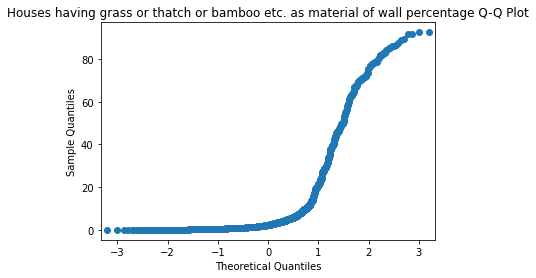

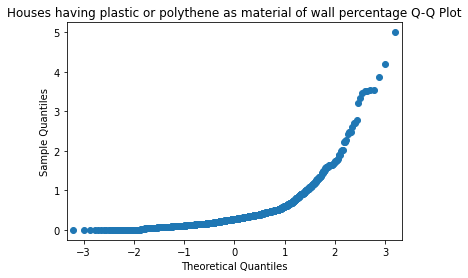

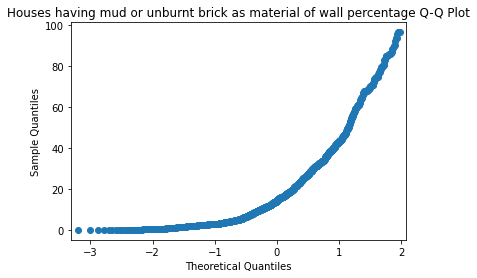

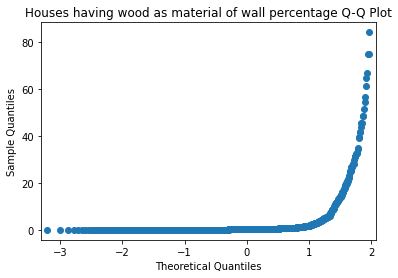

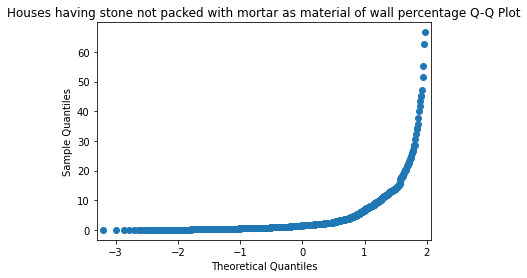

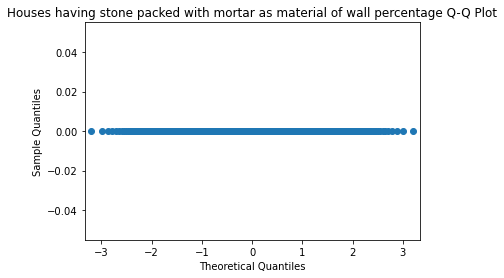

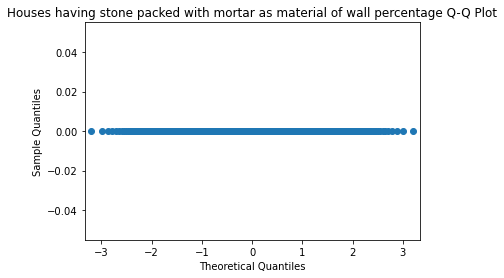

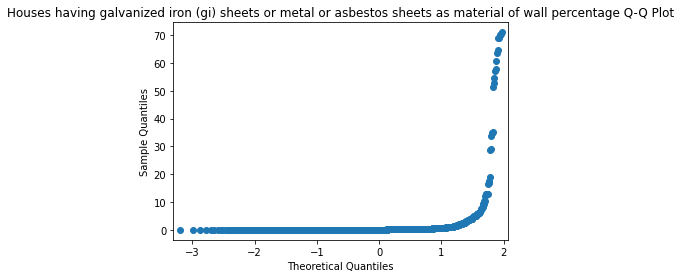

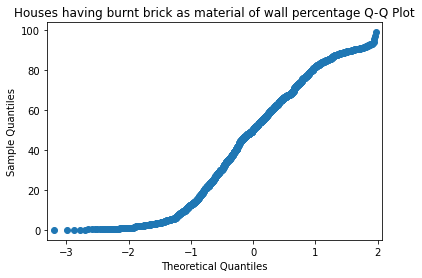

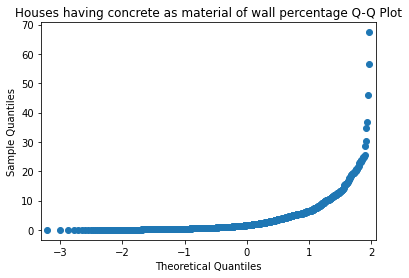

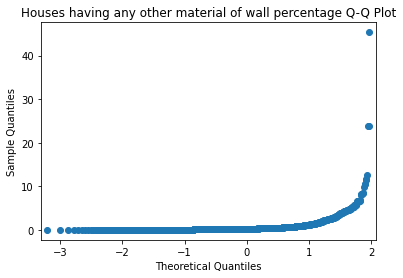

In [20]:
# 16.) For the new columns, plot Q-Q plot for Gaussian distribution.

# In statistics, a Q–Q plot is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other.

# The default Comparison distribution in Q–Q plot is a standard normal.


sm.qqplot(df['Houses having grass or thatch or bamboo etc. as material of wall percentage'], line =None)
plt.title('Houses having grass or thatch or bamboo etc. as material of wall percentage Q-Q Plot')
py.show()

sm.qqplot(df['Houses having plastic or polythene as material of wall percentage'], line =None)
plt.title('Houses having plastic or polythene as material of wall percentage Q-Q Plot')
py.show()

sm.qqplot(df['Houses having mud or unburnt brick as material of wall percentage'], line =None)
plt.title('Houses having mud or unburnt brick as material of wall percentage Q-Q Plot')
py.show()

sm.qqplot(df['Houses having wood as material of wall percentage'], line =None)
plt.title('Houses having wood as material of wall percentage Q-Q Plot')
py.show()

sm.qqplot(df['Houses having stone not packed with mortar as material of wall percentage'], line =None)
plt.title('Houses having stone not packed with mortar as material of wall percentage Q-Q Plot')
py.show()

sm.qqplot(df['Houses having stone packed with mortar as material of wall percentage'], line =None)
plt.title('Houses having stone packed with mortar as material of wall percentage Q-Q Plot')
py.show()

sm.qqplot(df['Houses having stone packed with mortar as material of wall percentage'], line =None)
plt.title('Houses having stone packed with mortar as material of wall percentage Q-Q Plot')
py.show()

sm.qqplot(df['Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage'], line =None)
plt.title('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage Q-Q Plot')
py.show()

sm.qqplot(df['Houses having burnt brick as material of wall percentage'], line =None)
plt.title('Houses having burnt brick as material of wall percentage Q-Q Plot')
py.show()

sm.qqplot(df['Houses having concrete as material of wall percentage'], line =None)
plt.title('Houses having concrete as material of wall percentage Q-Q Plot')
py.show()

sm.qqplot(df['Houses having any other material of wall percentage'], line =None)
plt.title('Houses having any other material of wall percentage Q-Q Plot')
py.show()

In [21]:
# 17.) Do some additional EDA of your choice and imagination.

## All the statistical parameters description for all the features in the Dataset.

df.describe()

,Rowid,State lgd code,District lgd code,Year,Houses having mud or unburnt brick as material of wall,Houses having wood as material of wall,Houses having stone not packed with mortar as material of wall,Houses having stone packed with mortar as material of wall,Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall,Houses having burnt brick as material of wall,...,Houses having grass or thatch or bamboo etc. as material of wall percentage,Houses having plastic or polythene as material of wall percentage,Houses having mud or unburnt brick as material of wall percentage,Houses having wood as material of wall percentage,Houses having stone not packed with mortar as material of wall percentage,Houses having stone packed with mortar as material of wall percentage,Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage,Houses having burnt brick as material of wall percentage,Houses having concrete as material of wall percentage,Houses having any other material of wall percentage
count,1473.000000,1473.000000,1473.000000,1473.0,1473.000000,1473.000000,1473.000000,1438.000000,1473.000000,1.473000e+03,...,1473.000000,1473.000000,1438.000000,1438.000000,1438.000000,1473.0,1438.000000,1438.000000,1438.000000,1438.000000
mean,737.000000,17.992532,1047.480652,2011.0,39685.387644,1150.497624,5617.638832,9.578066,977.112016,7.961218e+04,...,10.724374,0.400817,20.951412,2.191840,3.456867,0.0,1.290443,47.027389,3.357099,0.750913
std,425.362786,9.885655,26046.686177,0.0,64753.402723,3084.039311,11965.336691,15.772234,6118.025958,1.243068e+05,...,19.180403,0.473105,20.995359,7.508633,6.151627,0.0,6.700367,27.692819,5.062905,1.962807
min,1.000000,1.000000,1.000000,2011.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.021355,0.0,0.000000,0.000000,0.000000,0.000000
25%,369.000000,9.000000,185.000000,2011.0,2498.199858,76.000000,331.000000,0.847905,35.000000,9.025000e+03,...,0.848751,0.149989,4.437023,0.106093,0.692980,0.0,0.056402,23.256883,0.640547,0.114788
50%,737.000000,18.000000,369.000000,2011.0,10962.000000,266.000000,1429.036741,2.384143,116.000000,3.988100e+04,...,2.307186,0.274251,13.621414,0.248089,1.457751,0.0,0.122765,49.050640,1.511744,0.242546
75%,1105.000000,24.000000,554.000000,2011.0,50488.058280,885.000000,4852.000000,11.144336,344.000000,1.015090e+05,...,8.427048,0.452180,31.035673,0.715565,3.230067,0.0,0.306908,68.584598,4.160602,0.580539
max,1473.000000,38.000000,999999.000000,2011.0,550577.000000,48945.621080,145200.000000,95.567598,174598.000000,1.736398e+06,...,92.482857,4.998530,96.460821,84.250204,66.592384,0.0,70.984759,99.032648,67.409612,45.334174


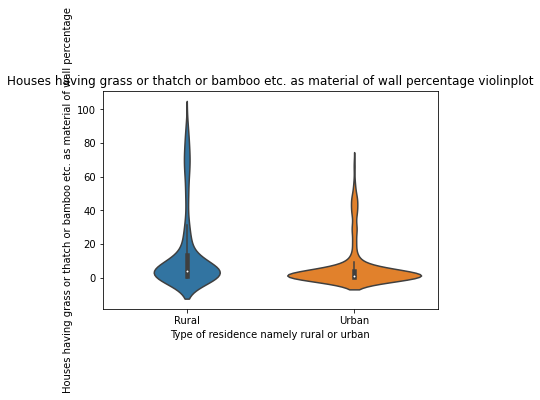

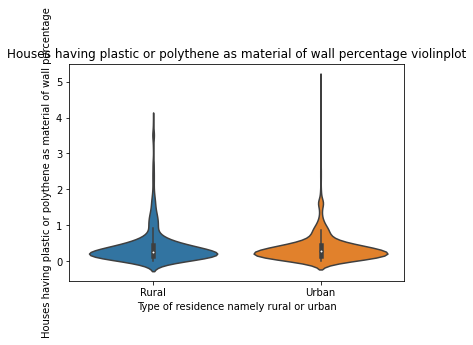

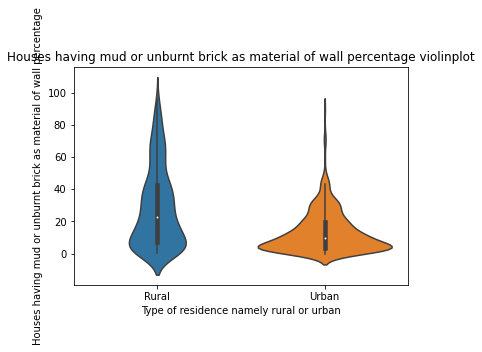

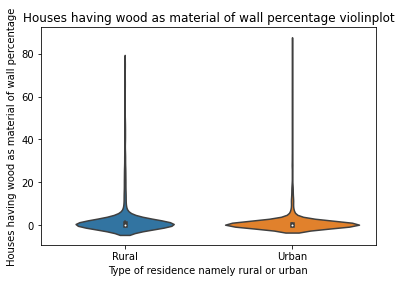

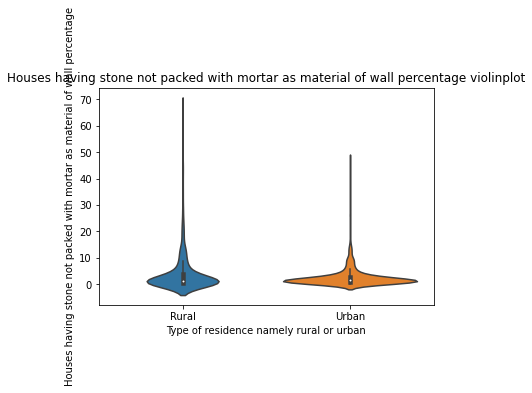

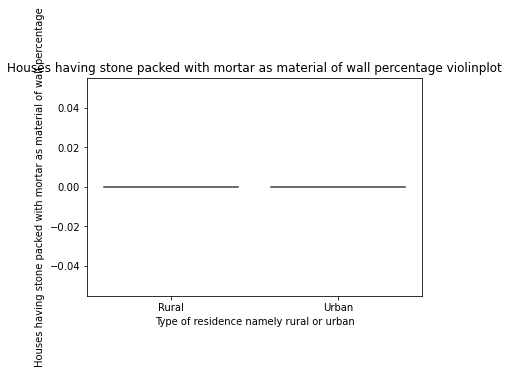

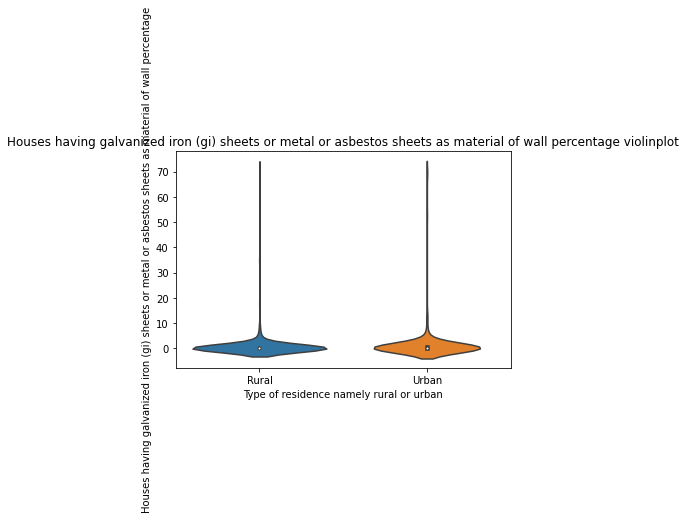

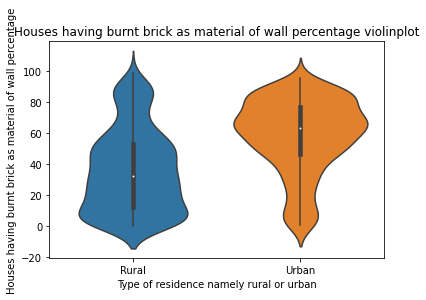

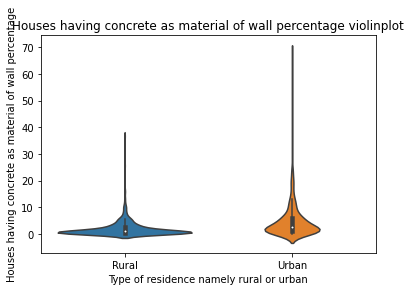

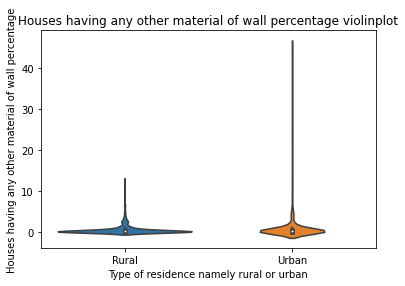

In [22]:
## Violinplot for all the newly created columns.

## Violin plots:- Violin plots are similar to box plots, except that they also show the probability density of the data at different values. These plots include amarker for the median of the data and a box indicating the interquartile range, as in the standard box plots.

## Violin plots w.r.t the 'Type of residence namely rural or urban' on the every new columns created.

sns.violinplot(x ='Type of residence namely rural or urban', y ='Houses having grass or thatch or bamboo etc. as material of wall percentage', data = df)
plt.title('Houses having grass or thatch or bamboo etc. as material of wall percentage violinplot')
py.show()

sns.violinplot(x ='Type of residence namely rural or urban', y ='Houses having plastic or polythene as material of wall percentage', data = df)
plt.title('Houses having plastic or polythene as material of wall percentage violinplot')
py.show()

sns.violinplot(x ='Type of residence namely rural or urban', y ='Houses having mud or unburnt brick as material of wall percentage', data = df)
plt.title('Houses having mud or unburnt brick as material of wall percentage violinplot')
py.show()

sns.violinplot(x ='Type of residence namely rural or urban', y ='Houses having wood as material of wall percentage', data = df)
plt.title('Houses having wood as material of wall percentage violinplot')
py.show()

sns.violinplot(x ='Type of residence namely rural or urban', y ='Houses having stone not packed with mortar as material of wall percentage', data = df)
plt.title('Houses having stone not packed with mortar as material of wall percentage violinplot')
py.show()

sns.violinplot(x ='Type of residence namely rural or urban', y ='Houses having stone packed with mortar as material of wall percentage', data = df)
plt.title('Houses having stone packed with mortar as material of wall percentage violinplot')
py.show()

sns.violinplot(x ='Type of residence namely rural or urban', y ='Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage', data = df)
plt.title('Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall percentage violinplot')
py.show()

sns.violinplot(x ='Type of residence namely rural or urban', y ='Houses having burnt brick as material of wall percentage', data = df)
plt.title('Houses having burnt brick as material of wall percentage violinplot')
py.show()

sns.violinplot(x ='Type of residence namely rural or urban', y ='Houses having concrete as material of wall percentage', data = df)
plt.title('Houses having concrete as material of wall percentage violinplot')
py.show()
sns.violinplot(x ='Type of residence namely rural or urban', y ='Houses having any other material of wall percentage', data = df)
plt.title('Houses having any other material of wall percentage violinplot')
py.show()